In [202]:
# Load all the modules we need
# For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime

# For ML
import sklearn

# For data manipulation
import numpy as np
import pandas as pd

# This makes all the plots to be shown within jupyter
%matplotlib inline
# Setting the default plot size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

First load the Excel sheet using pandas and then load each page into a new data frame

In [203]:
xlsx = pd.ExcelFile('C:\Users\HP PC\Desktop\Project.xlsx')

In [204]:
customer_order = xlsx.parse('customer order')
material_master = xlsx.parse('Material Master')
sales_past_demand = xlsx.parse('sales past demand')
customer_master = xlsx.parse('Customer Master')
invoice = xlsx.parse('Invoice')
stock_master = xlsx.parse('stock master')
delivery_data = xlsx.parse('Delivery data')
booking_data = xlsx.parse('Booking details')

# Pre-processing of data

## customer order

In [205]:
customer_order.head()

,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,CUST,PLNT,Price,customer PO ref,PO date
0,101195538,10,707-99-67090I.,ARM CYLINDER SEAL KIT (PC300-7),23-08-2016,1,CNG0101,930.0,14253,0100048101,2016-08-23 00:00:00
1,101195540,10,6114-80-7101I.,ELEMENT ASS'Y (GD623) ^$,23-08-2016,3,LUA1053,930.0,6024,SPR 130_ Ms MONTE CA,2206-08-19 00:00:00
2,101195542,10,723-40-50601I.,RELIEF VALVE (PC200-6),23-08-2016,2,BAC0093,930.0,9113,0100048104,2016-08-23 00:00:00
3,101195542,20,08088-30000I.,SWITCH (PC200-6) (17A-06-11361I),23-08-2016,1,BAC0093,930.0,5842,0100048104,2016-08-23 00:00:00
4,101195543,10,176-32-11210I.,SHOE BOLT (D155),23-08-2016,2,AHD0035,930.0,337,0100048105,2016-08-23 00:00:00


In [206]:
pd.isnull(customer_order).describe()

,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,CUST,PLNT,Price,customer PO ref,PO date
count,39398,39398,39398,39398,39398,39398,39398,39398,39398,39398,39398
unique,1,1,1,1,1,1,1,2,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,39398,39398,39398,39398,39398,39398,39398,39388,39398,39398,39398


There is some missing data in PLNT. Lets see what they are.

In [207]:
customer_order[pd.isnull(customer_order['PLNT'])]

,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,CUST,PLNT,Price,customer PO ref,PO date
511,101195625,110,702-21-07010I.,SOLENOID VALVE (PC300-7),25-08-2016,1,INT9520,NaN,0,LOI : L&T,2016-08-25 00:00:00
2015,101195896,10,208-06-71113.,WIRING (STARTING) HARNESS (PC450-7),01-09-2016,1,F3039,NaN,100116,order,2016-09-01 00:00:00
10623,103124997,1,R00450516TIN594A.,KIT FOR TIN-TIN594A,02-08-2016,2,BA9V000003,NaN,0,LT990/B16AC0017,2016-08-02 00:00:00
12048,101190431,240,208-979-7620I.,FILTER (PC400) ^$,04-04-2016,20,CAB0322,NaN,2298,Agreement dtd. 1.4.2,2015-04-01 00:00:00
12049,101190432,100,HLA120XS145CCI.,ADAPTER (PC2000-8R) (21T-70-34610I.),04-04-2016,8,CAB0322,NaN,231198,Agreement dtd. 1.4.2,2015-04-01 00:00:00
14630,101190708,10,H30341193.,1000 Hrs FILTER KIT PC130-7 FROM NL52047,12-04-2016,2,CAA0126,NaN,20452,Verbal discussion wi,2016-04-12 00:00:00
20895,101191843,10,L30441177.,KOMATSU HO46-HM (209 LTR),13-05-2016,5,CAC0086,NaN,28305,PSD/DGP/CBL/2016-17/,2016-05-13 00:00:00
24417,101192637,130,2113564SC.,'L' KIT - P410 (REG KIT),02-06-2016,5,CAS0820,NaN,8357,email on 27.05.2016,2016-05-27 00:00:00
28002,101193217,10,2405797SC.,Scania Oil LDF-3 10W-40 (P410) MOQ 210 L,20-06-2016,630,CAO0011,NaN,168,OSL/CO/PUR/2016-17/S,2016-06-13 00:00:00
28003,101193217,20,1421021SC.,AIR FILTER OUTER ELEMENT (P380),20-06-2016,10,CAO0011,NaN,4004,OSL/CO/PUR/2016-17/S,2016-06-13 00:00:00


Since there are only 10 values missing, lets fill it with the most common PLNT values.

In [208]:
customer_order.PLNT.describe()

count    39388.000000
mean       861.837869
std        196.784207
min        130.000000
25%        930.000000
50%        930.000000
75%        930.000000
max        930.000000
Name: PLNT, dtype: float64

In [209]:
customer_order.PLNT.fillna(930, inplace=True)

In [210]:
pd.isnull(customer_order).describe()

,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,CUST,PLNT,Price,customer PO ref,PO date
count,39398,39398,39398,39398,39398,39398,39398,39398,39398,39398,39398
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,39398,39398,39398,39398,39398,39398,39398,39398,39398,39398,39398


__pd.to_datetime(customer_order['PO date'])__ gives an error due to some strings which are set to 00:00:00. So we need to remove these first, we do this by setting PO date to the DATE

In [211]:
customer_order[customer_order['PO date'] == datetime.time(0)].count()

SONO               397
ITEM               397
PTNO               397
DESC               397
DATE               397
ORD_QTY            397
CUST               397
PLNT               397
Price              397
customer PO ref    397
PO date            397
dtype: int64

### Check date format

In [212]:
customer_order['DATE'][:2]

0    23-08-2016
1    23-08-2016
Name: DATE, dtype: object

In [213]:
customer_order['PO date'][:2]

0    2016-08-23 00:00:00
1    2206-08-19 00:00:00
Name: PO date, dtype: object

Fill in the missing 'PO date' with the corresponding values from 'DATE'. To do this, first get the month and day from each corresponding 'DATE' value. and using this and the year (2016) create a datetime.date and assign it to 'PO DATE'

In [214]:
tmp = customer_order[customer_order['PO date'] == datetime.time(0)]
day, month = [], []
for i in tmp['DATE'].str.split('-').values:
    day.append(int(i[0]))
    month.append(int(i[1]))
customer_order.loc[customer_order['PO date'] == datetime.time(0), 'PO date'] = [datetime.date(2016, m, d) for m, d in zip(month, day)]

In [215]:
customer_order['PO date'] = pd.to_datetime(customer_order['PO date'], format='%Y/%m/%d')

customer_order['DATE'] = pd.to_datetime(customer_order['DATE'], format='%d-%m-%Y')

In [216]:
x = (customer_order['DATE'] - customer_order['PO date'])
customer_order[x.dt.days < 0]

,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,CUST,PLNT,Price,customer PO ref,PO date
1,101195540,10,6114-80-7101I.,ELEMENT ASS'Y (GD623) ^$,2016-08-23,3,LUA1053,930.0,6024,SPR 130_ Ms MONTE CA,2206-08-19
3091,101196033,10,21M-939-2261I.,ADAPTER (PC600LC-8R),2016-09-07,3,A1284,930.0,36422,1200617997,2016-09-10
3092,101196033,20,209-939-7120I.,SHIM (PC1250-7),2016-09-07,1,A1284,930.0,366,1200617997,2016-09-10
3093,101196033,30,209-939-7110I.,SHIM (PC1250-7),2016-09-07,1,A1284,930.0,303,1200617997,2016-09-10
3094,101196033,40,07155-01125I.,WEAR RING,2016-09-07,2,A1284,930.0,1848,1200617997,2016-09-10
3095,101196033,50,195-30-18271I.,PACKING (D355A-1) 195-30-14210I,2016-09-07,2,A1284,930.0,1763,1200617997,2016-09-10
3096,101196033,60,04064-08530I.,SNAP RING (D275),2016-09-07,2,A1284,930.0,375,1200617997,2016-09-10
3097,101196033,70,707-99-56220I.,SERVICE KIT (PC600LC-6),2016-09-07,2,A1284,930.0,45217,1200617997,2016-09-10
3098,101196033,80,707-99-77160I.,SERVICE KIT (PC600-6),2016-09-07,2,A1284,930.0,82255,1200617997,2016-09-10
3099,101196033,90,707-99-67830I.,SERVICE KIT (PC600LC-6),2016-09-07,2,A1284,930.0,46875,1200617997,2016-09-10


As you can see above there are still ~80 rows which have date > po date, this could perhaps be deleted.

In [217]:
customer_order.drop(customer_order[x.dt.days < 0].index, inplace=True)

## material_master

In [218]:
material_master.head()

,Material code`,Material Description,Type,Unit,Model,safety stock,Demand
0,01010-61435I.,BOLT (01010-51435I),ROH,EA,PC450,8,30
1,01010-61455I.,BOLT (D65E-12) (01010-31455I.),ROH,EA,D65,1,2
2,01010-61635I.,BOLT (GD511),ROH,EA,GD511,1,12
3,01010-61645I.,BOLT (01010-81645I.),ROH,EA,D475,8,32
4,01010-61650I.,BOLT (HD465) (01010-81650I.),ROH,EA,HD465,5,18


In [219]:
pd.isnull(material_master).describe()

,Material code`,Material Description,Type,Unit,Model,safety stock,Demand
count,6022,6022,6022,6022,6022,6022,6022
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,6022,6022,6022,6022,6022,6022,6022


No null values here, lets just remove unwated columns: 1. Type 2. Unit

In [220]:
material_master.drop(['Type', 'Unit'], axis=1, inplace=True)

In [221]:
material_master.columns

Index([u'Material code`', u'Material Description', u'Model', u'safety stock',
       u'Demand'],
      dtype='object')

In [222]:
material_master.rename(columns={'Material code`': 'Material code'}, inplace=True)

## sales past demand


In [223]:
sales_past_demand.head()

,Material code`,DEM36,DEM35,DEM34,DEM33,DEM32,DEM31,DEM30,DEM29,DEM28,...,DEM10,DEM9,DEM8,DEM7,DEM6,DEM5,DEM4,DEM3,DEM2,DEM1
0,01010-61435I.,6,0,0,0,0,0,5,0,0,...,0,4,0,0,16,12,2,0,0,0
1,01010-61455I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,01010-61635I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,1,0
3,01010-61645I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,01010-61650I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


This holds the sales demands for given materials for the last 36months, this could be used to make predicitons for future demands. No pre-processing required here

In [224]:
sales_past_demand.columns

Index([u'Material code`', u'DEM36', u'DEM35', u'DEM34', u'DEM33', u'DEM32',
       u'DEM31', u'DEM30', u'DEM29', u'DEM28', u'DEM27', u'DEM26', u'DEM25',
       u'DEM24', u'DEM23', u'DEM22', u'DEM21', u'DEM20', u'DEM19', u'DEM18',
       u'DEM17', u'DEM16', u'DEM15', u'DEM14', u'DEM13', u'DEM12', u'DEM11',
       u'DEM10', u'DEM9', u'DEM8', u'DEM7', u'DEM6', u'DEM5', u'DEM4', u'DEM3',
       u'DEM2', u'DEM1'],
      dtype='object')

In [225]:
sales_past_demand.rename(columns={'Material code`': 'Material code'}, inplace=True)

## customer_master

In [226]:
customer_master.head()

,customer code,Name,Street,City,PostalCode,Region,Industry
0,A1283,ACC LIMITED,P O CEMENT NAGAR,CHANDRAPUR,442502,Maharashtra,Mining
1,A1284,ASSOCIATED CEMENT CO LTD,P.O. KYMORE,KATNI,483880,Madhya Pradesh,Cement
2,A1285,ACC LIMITED,"1 P.O.JAMUL CEMENT WORKS,",DIST : DURG (C.G.),490024,Chattisgarh,Mining
3,A1438,AMBUJA CEMENT LIMITED,"(Unit : Ambujanagar),","Taluka Kodinar,Junagadh",362715,Gujarat,Cement
4,A1896,AMBUJA CEMENTS LTD.,"P.O. Rawan, Tehsil: Baloda Bazar",RAIPUR,493331,Chattisgarh,Mining


In [227]:
pd.isnull(customer_master).describe()

,customer code,Name,Street,City,PostalCode,Region,Industry
count,976,976,976,976,976,976,976
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,976,976,976,976,976,976,976


No null values here, lets remove the unwated columns: 1. Street, 2. City

In [228]:
customer_master.drop(['Street', 'City'], axis=1, inplace=True)

In [229]:
customer_master.columns

Index([u'customer code', u'Name ', u'PostalCode', u'Region', u'Industry'], dtype='object')

In [230]:
customer_master.rename(columns={'Name ': 'Name'}, inplace=True)

## invoice

In [231]:
invoice.head()

,Bill.Doc.,Item,Material code,Description,Required quantity,Billed Quantity,Value,delivery doc,RefItm,Sales ord,so Item,Plnt,Bill date
0,90025694,10,7861-93-2330I.,SENSOR (PC300),2,2,11759,81223222,10,101192139,10,930,2016-05-26
1,90025696,60,207-32-61260I.,SEAL (PC300) (150-32-11260I),12,9,1599,81224013,60,101192000,60,930,2016-05-26
2,90025696,120,207-70-34230I.,BUSHING (PC300SE-7),2,1,6267,81224013,120,101192000,120,930,2016-05-26
3,90025697,10,23B-27-11132I.,HUB (GD623),1,1,31718,81223587,10,101190426,10,930,2016-05-26
4,90025698,20,6732-51-8330I.,O-RING (PC200-6),2,1,60,81223590,20,101191683,20,930,2016-05-26


In [232]:
pd.isnull(invoice).describe()

,Bill.Doc.,Item,Material code,Description,Required quantity,Billed Quantity,Value,delivery doc,RefItm,Sales ord,so Item,Plnt,Bill date
count,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343,39343


No null values here too. Lets remove unwanted columns: 1. Refitm 2. so item

In [233]:
invoice.drop(['so Item', 'RefItm'], axis=1, inplace=True)

Convert the date to pd_datetime

In [234]:
invoice['Bill date'] = pd.to_datetime(invoice['Bill date'], format='%Y/%m/%d')

In [235]:
invoice.columns

Index([u'Bill.Doc.', u'Item', u'Material code', u'Description',
       u'Required quantity', u'Billed Quantity', u'Value', u'delivery doc',
       u'Sales ord', u'Plnt', u'Bill date'],
      dtype='object')

## stock_master

In [236]:
stock_master.head()

,Material,ValA,DocumentNo,Year,Itm,D/C,Amount,Quantity,BUn,Pstng Date
0,01010-61435I.,930,920006718,2016,2,Recpt,167.56,4,EA,2016-04-22
1,01010-61435I.,930,920006757,2016,21,Issu,167.56,4,EA,2016-04-22
2,01010-61435I.,930,920009004,2016,2,Recpt,502.68,12,EA,2016-04-29
3,01010-61435I.,930,920009049,2016,1,Issu,502.68,12,EA,2016-04-29
4,01010-61435I.,930,920011287,2016,13,Recpt,708.00,15,EA,2016-05-04


In [237]:
pd.isnull(stock_master).describe()

,Material,ValA,DocumentNo,Year,Itm,D/C,Amount,Quantity,BUn,Pstng Date
count,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555


No null values here. Lets remove unwanted columns: 1. Year 2. ValA

In [238]:
stock_master.drop(['ValA', 'Year'], axis=1, inplace=True)

Convert date to pd_datetime

In [239]:
stock_master['Pstng Date'] = pd.to_datetime(stock_master['Pstng Date'], format='%Y/%m/%d')

In [240]:
stock_master.columns

Index([u'Material', u'DocumentNo', u'Itm', u'D/C', u'Amount', u'   Quantity',
       u'BUn', u'Pstng Date'],
      dtype='object')

In [241]:
stock_master.rename(columns={'   Quantity': 'Quantity'}, inplace=True)

## delivery data

In [242]:
delivery_data.head()

,Delivery no,delivery Item,Material,Plnt,Delivery quantity,Unit,date,Description,sales ord,sale ord item
0,81211954,10,600-181-6740I.,299,1,EA,2016-04-04,AIR CLEANER ELEMENT ASSY (PC200-6) ^$,103121287,10
1,81211955,10,600-181-6740I.,299,1,EA,2016-04-04,AIR CLEANER ELEMENT ASSY (PC200-6) ^$,103121288,10
2,81211957,10,600-411-1151I.,299,1,EA,2016-04-04,CORROSION RESISTOR FILTER (PC200-6) ^$,103121290,10
3,81211967,10,600-411-1151I.,299,1,EA,2016-04-04,CORROSION RESISTOR FILTER (PC200-6) ^$,103121289,10
4,81212008,10,WL10670A2582.,930,1,EA,2016-04-05,TUBE-LIFT BORE SPOOL,103121296,10


Dropping plant and unit, as its not needed

In [243]:
delivery_data.drop(['Plnt', 'Unit'], axis=1, inplace=True)

In [244]:
pd.isnull(delivery_data).describe()

,Delivery no,delivery Item,Material,Delivery quantity,date,Description,sales ord,sale ord item
count,40356,40356,40356,40356,40356,40356,40356,40356
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,40356,40356,40356,40356,40356,40356,40356,40356


No missing data here

In [245]:
delivery_data.columns

Index([u'Delivery no', u'delivery Item', u'Material', u'Delivery quantity',
       u'date', u'Description', u'sales ord ', u'sale ord item'],
      dtype='object')

In [246]:
delivery_data.rename(columns={'sales ord ': 'sales ord'}, inplace=True)

## booking_data

In [247]:
booking_data.head()

,Delivery no,Delivery date,ShPt,SOrg.,Consignment details,GC date,Recpt date
0,81211954,2016-04-04,299,50,LOCAL COLLECTION - PRASHANT,2016-04-11,2016-05-05
1,81211955,2016-04-04,299,50,LOCAL COLLECTION - PRASHANT,2016-04-11,2016-05-05
2,81211957,2016-04-04,299,50,LOCAL COLLECTION - PRASHANT,2016-04-11,2016-05-05
3,81211967,2016-04-04,299,50,LOCAL COLLECTION - PRASHANT,2016-04-11,2016-05-05
4,81212008,2016-04-05,930,50,BYHAND RAKESH 05-04-2016,2016-04-05,2016-04-06


In [248]:
pd.isnull(booking_data).describe()

,Delivery no,Delivery date,ShPt,SOrg.,Consignment details,GC date,Recpt date
count,8445,8445,8445,8445,8445,8445,8445
unique,1,1,1,1,2,2,2
top,False,False,False,False,False,False,False
freq,8445,8445,8445,8445,7559,8441,8443


There are null values in Consigment details, GC date and Recpt date, lets have a look

In [249]:
booking_data.loc[pd.isnull(booking_data['Consignment details']), 'Consignment details'] = "No details"

For GC date and Recpt date, we can only 3~4 rows are missing data, lets drop these rows

In [250]:
booking_data.drop(booking_data[pd.isnull(booking_data['GC date'])].index, inplace=True)

In [251]:
booking_data[pd.isnull(booking_data['Recpt date'])]

,Delivery no,Delivery date,ShPt,SOrg.,Consignment details,GC date,Recpt date


Luckily the fields which were missing the GC date and Recpt date, were overlapping. Lets drop unwanted rows: 1. ShPt 2. SOrg.

In [252]:
booking_data.drop(['ShPt', 'SOrg.'], axis=1, inplace=True)

# Merging the tables

Since there are multiple tables and there is a strong relation amongst these tables, we could merge the tables for easier access and manipulation

### Customer Order and Master

In [253]:
customer_order.head(2)

,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,CUST,PLNT,Price,customer PO ref,PO date
0,101195538,10,707-99-67090I.,ARM CYLINDER SEAL KIT (PC300-7),2016-08-23,1,CNG0101,930.0,14253,0100048101,2016-08-23
2,101195542,10,723-40-50601I.,RELIEF VALVE (PC200-6),2016-08-23,2,BAC0093,930.0,9113,0100048104,2016-08-23


In [254]:
customer_master.head(2)

,customer code,Name,PostalCode,Region,Industry
0,A1283,ACC LIMITED,442502,Maharashtra,Mining
1,A1284,ASSOCIATED CEMENT CO LTD,483880,Madhya Pradesh,Cement


In [255]:
customer = pd.merge(customer_master, customer_order, left_on=['customer code'], right_on=['CUST'])

In [256]:
customer.drop(['CUST'], axis=1, inplace=True)

In [257]:
print('Customer order:', len(customer_order))
print('Customer master:', len(customer_master))
print('Customer:', len(customer))

('Customer order:', 39315)
('Customer master:', 976)
('Customer:', 39315)


No data loss here

## Bill

In [258]:
print(len(invoice))
invoice.head(2)

39343


,Bill.Doc.,Item,Material code,Description,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date
0,90025694,10,7861-93-2330I.,SENSOR (PC300),2,2,11759,81223222,101192139,930,2016-05-26
1,90025696,60,207-32-61260I.,SEAL (PC300) (150-32-11260I),12,9,1599,81224013,101192000,930,2016-05-26


In [259]:
print(len(delivery_data))
delivery_data.head(2)

40356


,Delivery no,delivery Item,Material,Delivery quantity,date,Description,sales ord,sale ord item
0,81211954,10,600-181-6740I.,1,2016-04-04,AIR CLEANER ELEMENT ASSY (PC200-6) ^$,103121287,10
1,81211955,10,600-181-6740I.,1,2016-04-04,AIR CLEANER ELEMENT ASSY (PC200-6) ^$,103121288,10


We can see that there is no unique key, lets try and find a combination of keys to get a unique key

In [260]:
delivery_data[(delivery_data['sales ord'] == 101190353) & (delivery_data['sale ord item'] == 50)]

,Delivery no,delivery Item,Material,Delivery quantity,date,Description,sales ord,sale ord item
809,81213104,50,07000-12115I.,3,2016-04-11,O-RING (D275),101190353,50
15513,81229842,50,07000-12115I.,7,2016-06-16,O-RING (D275),101190353,50


In [261]:
invoice[(invoice['Sales ord'] == 101190353) & (invoice['Item'] == 50)]

,Bill.Doc.,Item,Material code,Description,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date
2554,167206633,50,07000-12115I.,O-RING (D275),10,3,698,81213104,101190353,930,2016-04-12
14231,167210377,50,07000-12115I.,O-RING (D275),10,7,1628,81229842,101190353,930,2016-06-17


Using ['Sales ord', 'Item', 'Billed Quantity'] from invoice and ['sales ord ', 'sale ord item', 'Delivery quantity'] from delivery data, we can get the unique row for merging 

In [262]:
bill = pd.merge(invoice, delivery_data, left_on=['Sales ord', 'Item', 'Billed Quantity'], right_on=['sales ord', 'sale ord item', 'Delivery quantity'])

In [263]:
bill.head(2)

,Bill.Doc.,Item,Material code,Description_x,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,Delivery quantity,date,Description_y,sales ord,sale ord item
0,90025694,10,7861-93-2330I.,SENSOR (PC300),2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2,2016-06-06,SENSOR (PC300),101192139,10
1,167208916,10,7861-93-2330I.,SENSOR (PC300),2,2,11759,81223222,101192139,930,2016-05-24,81226681,10,7861-93-2330I.,2,2016-06-06,SENSOR (PC300),101192139,10


In [264]:
bill.drop(['sales ord', 'sale ord item', 'Delivery quantity'], axis=1, inplace=True)

In [265]:
bill.drop(['Description_x'], axis = 1, inplace=True)
bill.rename(columns={'Description_y':'Description'}, inplace=True)

In [266]:
bill.rename(columns={'date':'delivery date'}, inplace=True)

In [267]:
(bill['delivery Item'] == bill['Item']).value_counts()

True    40307
dtype: int64

In [268]:
bill.drop(['Item'], axis=1, inplace=True)

In [269]:
len(bill.groupby(['Delivery no']).count())

7844

In [270]:
bill.head(2)

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description
0,90025694,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300)
1,167208916,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-24,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300)


In [271]:
print(len(booking_data))
booking_data.head(2)

8441


,Delivery no,Delivery date,Consignment details,GC date,Recpt date
0,81211954,2016-04-04,LOCAL COLLECTION - PRASHANT,2016-04-11,2016-05-05
1,81211955,2016-04-04,LOCAL COLLECTION - PRASHANT,2016-04-11,2016-05-05


Now we can merge the booking data onto the bill

In [272]:
bill = pd.merge(bill, booking_data, on='Delivery no', how='left')

In [273]:
bill.head(2)

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description,Delivery date,Consignment details,GC date,Recpt date
0,90025694,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17
1,167208916,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-24,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17


# Analysis of Duplicates

## Bill

In [274]:
bill[bill['Sales ord'] == 101192139]

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description,Delivery date,Consignment details,GC date,Recpt date
0,90025694,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17
1,167208916,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-24,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17
2,167209909,7861-93-2330I.,2,2,11759,81226681,101192139,930,2016-06-09,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17


In [275]:
bill[bill.duplicated(['Sales ord', 'Delivery no', 'Description', 'Consignment details', 'Value'])]

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description,Delivery date,Consignment details,GC date,Recpt date
1,167208916,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-24,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17
2,167209909,7861-93-2330I.,2,2,11759,81226681,101192139,930,2016-06-09,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17
4,167209055,207-32-61260I.,12,9,1599,81224013,101192000,930,2016-05-26,81227687,60,207-32-61260I.,2016-06-08,SEAL (PC300) (150-32-11260I),2016-06-08,442177440 GATI 10-06-2016,2016-06-08,2016-06-15
5,167209887,207-32-61260I.,12,9,1599,81227687,101192000,930,2016-06-09,81227687,60,207-32-61260I.,2016-06-08,SEAL (PC300) (150-32-11260I),2016-06-08,442177440 GATI 10-06-2016,2016-06-08,2016-06-15
10,167209055,207-70-34230I.,2,1,6267,81224013,101192000,930,2016-05-26,81222304,120,207-70-34230I.,2016-05-19,BUSHING (PC300SE-7),2016-05-19,725260093 XPS 19-05-2016,2016-05-19,2016-05-21
11,167209055,207-70-34230I.,2,1,6267,81224013,101192000,930,2016-05-26,81227687,120,207-70-34230I.,2016-06-08,BUSHING (PC300SE-7),2016-06-08,442177440 GATI 10-06-2016,2016-06-08,2016-06-15
12,167209887,207-70-34230I.,2,1,6267,81227687,101192000,930,2016-06-09,81222304,120,207-70-34230I.,2016-05-19,BUSHING (PC300SE-7),2016-05-19,725260093 XPS 19-05-2016,2016-05-19,2016-05-21
13,167209887,207-70-34230I.,2,1,6267,81227687,101192000,930,2016-06-09,81227687,120,207-70-34230I.,2016-06-08,BUSHING (PC300SE-7),2016-06-08,442177440 GATI 10-06-2016,2016-06-08,2016-06-15
15,167209034,23B-27-11132I.,1,1,31718,81223587,101190426,930,2016-05-26,81227680,10,23B-27-11132I.,2016-06-08,HUB (GD623),2016-06-08,442177426 GATI 09-06-2016,2016-06-08,2016-06-15
16,167209884,23B-27-11132I.,1,1,31718,81227680,101190426,930,2016-06-09,81227680,10,23B-27-11132I.,2016-06-08,HUB (GD623),2016-06-08,442177426 GATI 09-06-2016,2016-06-08,2016-06-15


lets drop these duplicates 

In [276]:
bill.drop(bill[bill.duplicated(['Sales ord', 'Delivery no', 'Description', 'Consignment details', 'Value'])].index, inplace=True)

In [277]:
bill[bill['Sales ord'] == 101192139]

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description,Delivery date,Consignment details,GC date,Recpt date
0,90025694,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17


### Customer 

In [278]:
customer[customer.duplicated(['PTNO', 'customer code', 'SONO', 'Price', 'ITEM'], keep=False)]

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date


### material_master

In [279]:
material_master.head(2)

,Material code,Material Description,Model,safety stock,Demand
0,01010-61435I.,BOLT (01010-51435I),PC450,8,30
1,01010-61455I.,BOLT (D65E-12) (01010-31455I.),D65,1,2


In [280]:
material_master[material_master.duplicated(['Material code'], keep=False)]

,Material code,Material Description,Model,safety stock,Demand


### stock master

In [281]:
stock_master.head(2)

,Material,DocumentNo,Itm,D/C,Amount,Quantity,BUn,Pstng Date
0,01010-61435I.,920006718,2,Recpt,167.56,4,EA,2016-04-22
1,01010-61435I.,920006757,21,Issu,167.56,4,EA,2016-04-22


In [282]:
stock_master[stock_master.duplicated(['Material', 'Itm', 'DocumentNo'], keep=False)]

,Material,DocumentNo,Itm,D/C,Amount,Quantity,BUn,Pstng Date


### sales_past_demand

In [283]:
sales_past_demand.head(2)

,Material code,DEM36,DEM35,DEM34,DEM33,DEM32,DEM31,DEM30,DEM29,DEM28,...,DEM10,DEM9,DEM8,DEM7,DEM6,DEM5,DEM4,DEM3,DEM2,DEM1
0,01010-61435I.,6,0,0,0,0,0,5,0,0,...,0,4,0,0,16,12,2,0,0,0
1,01010-61455I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [284]:
sales_past_demand[sales_past_demand.duplicated(['Material code'], keep=False)]

,Material code,DEM36,DEM35,DEM34,DEM33,DEM32,DEM31,DEM30,DEM29,DEM28,...,DEM10,DEM9,DEM8,DEM7,DEM6,DEM5,DEM4,DEM3,DEM2,DEM1


# End of Pre-Processing 

Now the data has been cleaned up and duplicates have been removed. We've also merged relavant data together to get new df's. 

Currently we have the following DF's:
1. bill
2. customer
3. sales_past_demand
4. stock_master
5. material master

# Data Analysis

# Order to Delivery reports

The order to delivery analysis comprises finding the following:
1. Order to delivery note generation
2. Delivery to invoice generation
3. Invoice to consignment
4. Consignment to reaching customers(Recpt date)

## 1.Order to delivery note generation


In [285]:
#We consider Customer and Delivery data table and map them using (SONO + Item).
#We then find days taken between the date of order(PO date) and date of delivery note generation(date)

customer.head(2)

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date
0,A1283,ACC LIMITED,442502,Maharashtra,Mining,101191774,10,6261-71-4112I.,TUBE (D155A-6) (6261-71-4111I.),2016-05-11,1,930.0,4017,Req of Mr. Bhattacha,2016-05-11
1,A1284,ASSOCIATED CEMENT CO LTD,483880,Madhya Pradesh,Cement,101196605,10,702-21-57700I.,PILOT VALVE (PC2000-8R) (702-21-55800I.),2016-09-22,2,930.0,15344,1200620728 & 1200620,2016-09-16


In [286]:
bill.head(2)

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description,Delivery date,Consignment details,GC date,Recpt date
0,90025694,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17
3,90025696,207-32-61260I.,12,9,1599,81224013,101192000,930,2016-05-26,81227687,60,207-32-61260I.,2016-06-08,SEAL (PC300) (150-32-11260I),2016-06-08,442177440 GATI 10-06-2016,2016-06-08,2016-06-15


In [287]:
# Bill is missing the PO Date, which we need, lets add that

tmp = customer[['SONO', 'PO date', 'ITEM']]
bill = bill.merge(tmp, how='left', left_on=['Sales ord', 'delivery Item'], right_on=['SONO', 'ITEM'])
bill.drop(['SONO', 'ITEM'], axis=1, inplace=True)

In [288]:
bill.head(2)

,Bill.Doc.,Material code,Required quantity,Billed Quantity,Value,delivery doc,Sales ord,Plnt,Bill date,Delivery no,delivery Item,Material,delivery date,Description,Delivery date,Consignment details,GC date,Recpt date,PO date
0,90025694,7861-93-2330I.,2,2,11759,81223222,101192139,930,2016-05-26,81226681,10,7861-93-2330I.,2016-06-06,SENSOR (PC300),2016-06-06,806869210 TCI 09-06-2016 GD,2016-06-06,2016-06-17,2016-05-16
1,90025696,207-32-61260I.,12,9,1599,81224013,101192000,930,2016-05-26,81227687,60,207-32-61260I.,2016-06-08,SEAL (PC300) (150-32-11260I),2016-06-08,442177440 GATI 10-06-2016,2016-06-08,2016-06-15,2016-05-13


In [289]:
order_to_delivery = bill[['PO date', 'Delivery date']]
order_to_delivery.loc[:, 'ORD_to_DEL'] = order_to_delivery['Delivery date'] - order_to_delivery['PO date']

In [290]:
order_to_delivery.head(2)

,PO date,Delivery date,ORD_to_DEL
0,2016-05-16,2016-06-06,21 days
1,2016-05-13,2016-06-08,26 days


In [291]:
tmp = order_to_delivery['ORD_to_DEL'].value_counts().reset_index()
tmp.columns = ['Days', 'Count']
tmp['Days'] = tmp['Days'].apply(lambda x: x.days)
tmp.sort_values(by=['Days'], inplace=True)
tmp = tmp.reset_index().drop('index', axis=1)

In [292]:
def display_days_difference(tmp, title):
    
    df = pd.DataFrame(columns=['Days', 'cum'])
    for i in xrange(7):
        df.loc[i] = [str(i) + ' days', tmp[tmp['Days'] <= i]['Count'].sum()]
    df.loc[7] = ['< 1 week', tmp[tmp['Days'] <= 7]['Count'].sum()]
    df.loc[8] = ['< 2 weeks', tmp[tmp['Days'] <= 14]['Count'].sum()]
    df.loc[9] = ['< 3 weeks', tmp[tmp['Days'] <= 21]['Count'].sum()]
    df.loc[10] = ['< 1 month', tmp[tmp['Days'] <= 30]['Count'].sum()]
    df.loc[11] = ['> 1 month', tmp['Count'].sum()]

    df['Count'] = df['cum']
    for i in xrange(11, 0, -1):
        df.loc[i, 'Count'] = df.loc[i, 'Count'] - df.loc[i - 1, 'Count']  
    
    df['percentage'] = 100*df.Count/df.Count.sum()
    df['cum percent'] = df.percentage.cumsum()
    
    #setting font size
    plt.rc('axes', titlesize=30)     # fontsize of the axes title
    plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
    
    for (i, j) in [('Count', 'percentage'), ('cum', 'cum percent')]:    
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.bar([x for x in xrange(len(df))], df[i], width=.5, label=i)
        ax2.plot([x for x in xrange(len(df))], df[j], color='red', marker='o')
        for k in xrange(len(df)):
            ax1.text(k, df[i][k] + 300, str(float(df[j][k]))[:4], horizontalalignment='center')
        plt.xticks([x for x in xrange(len(df))], df['Days'])
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc=0)
        plt.title(title)
        plt.show()

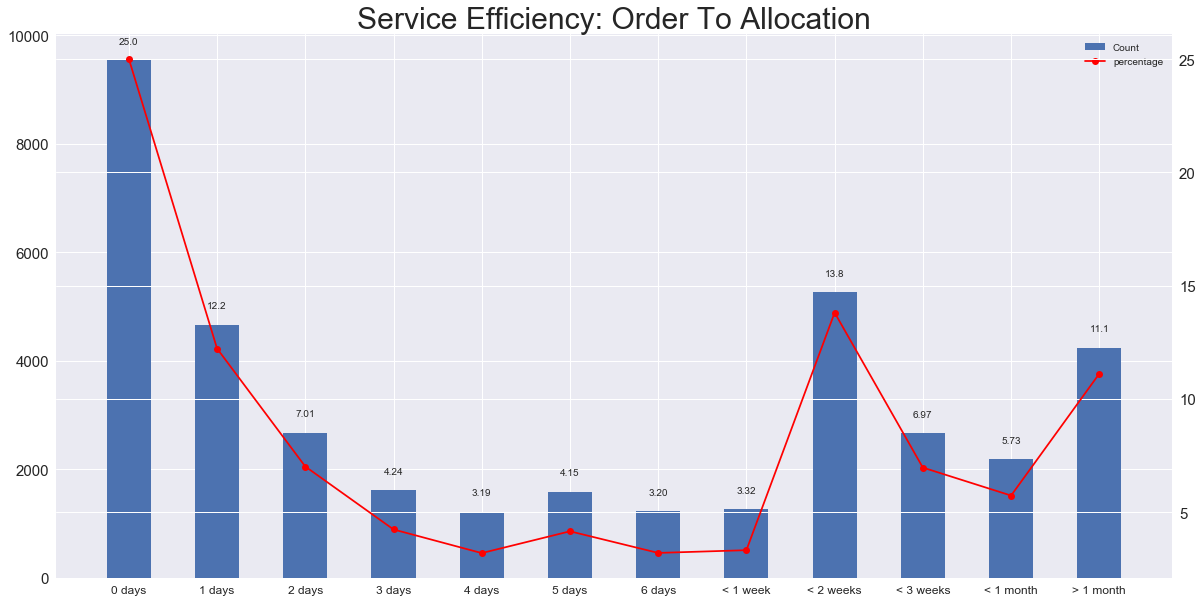

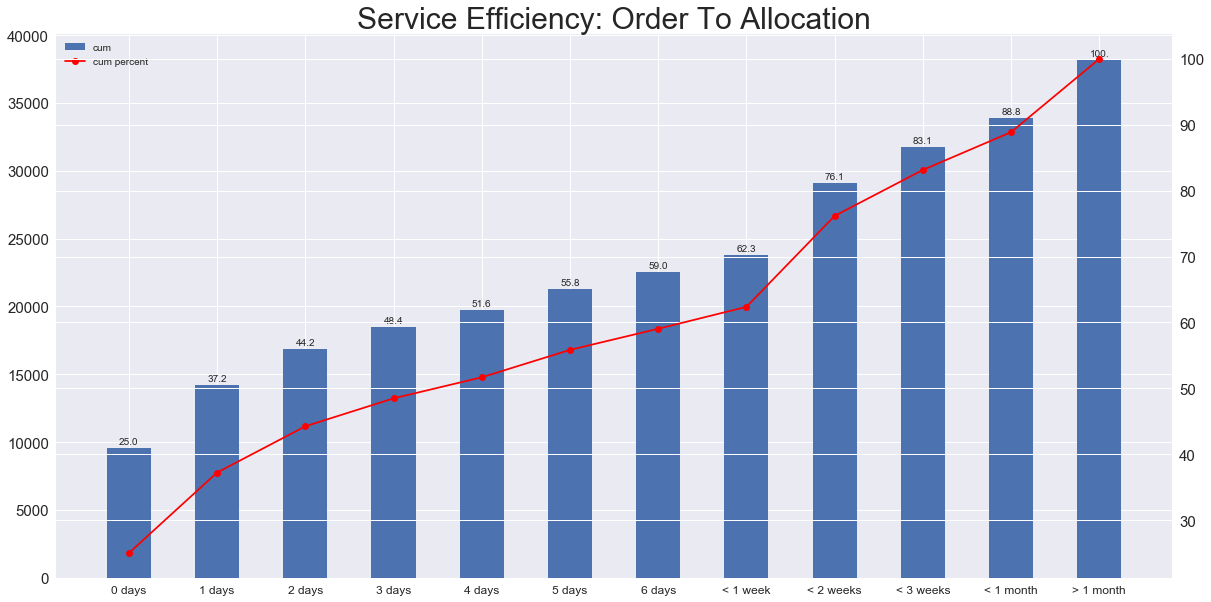

In [293]:
display_days_difference(tmp, 'Service Efficiency: Order To Allocation')

## 2. Delivery to invoice generation.

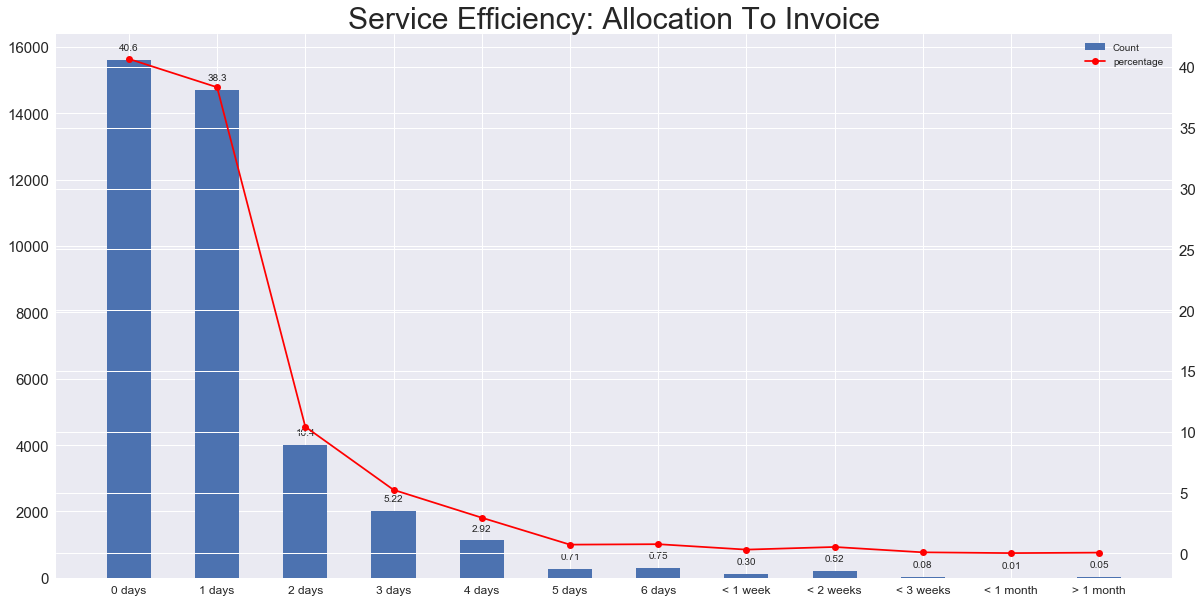

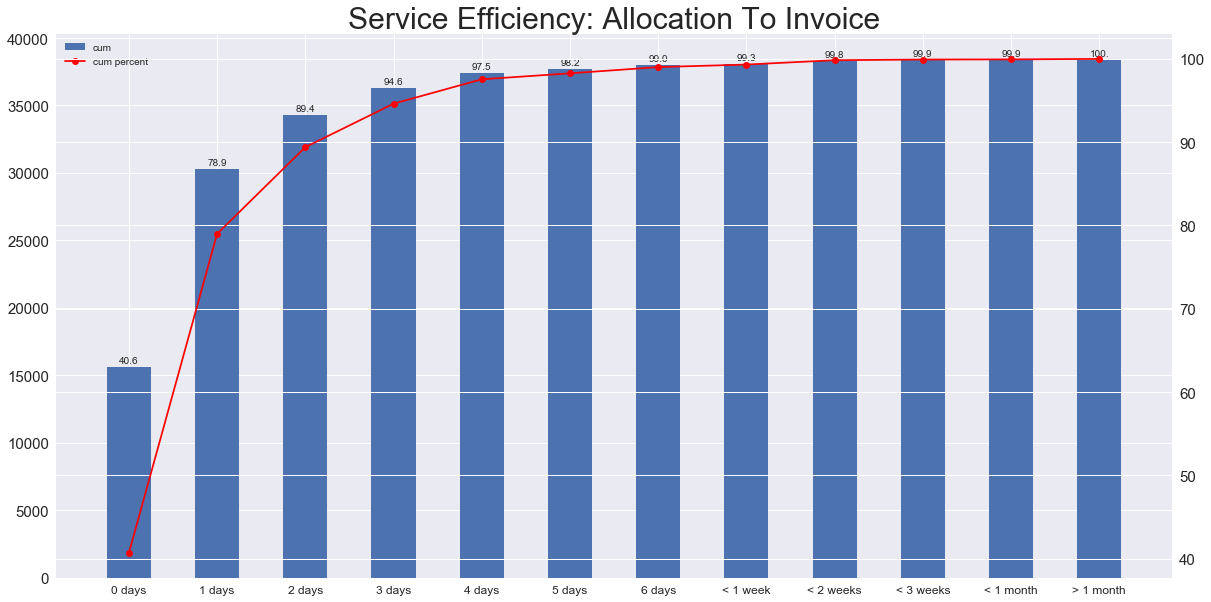

In [294]:
delivery_to_bill = bill[['Bill date', 'Delivery date']]
delivery_to_bill.loc[:, 'DEL_TO_BILL'] = delivery_to_bill['Bill date'] - delivery_to_bill['Delivery date']
tmp = delivery_to_bill['DEL_TO_BILL'].value_counts().reset_index()
tmp.columns = ['Days', 'Count']
tmp['Days'] = tmp['Days'].apply(lambda x: x.days)
tmp.sort_values(by=['Days'], inplace=True)
tmp = tmp.reset_index().drop('index', axis=1)
display_days_difference(tmp, 'Service Efficiency: Allocation To Invoice')

## 3. Invoice to consignment generation

In [295]:
bill_to_GC = bill[['Bill date', 'GC date']]
bill_to_GC.loc[:, 'BILL_TO_GC'] = bill_to_GC['GC date'] - bill_to_GC['Bill date']
bill_to_GC.loc[:, 'BILL_TO_GC'] = bill_to_GC['BILL_TO_GC'].dt.components.days

In [296]:
def test2 (row):
   if row['BILL_TO_GC'] < -10  :
      return 3
   if row['BILL_TO_GC'] < -5   :
      return 2
   if row['BILL_TO_GC'] < -1   :
      return 1
  
   return 0

In [297]:
bill_to_GC.loc[:, 'BILL_TO_GC'] = bill_to_GC.apply(lambda row: test2 (row),axis =1)
bill_to_GC.loc[:, 'BILL_TO_GC'] = pd.to_timedelta(bill_to_GC['BILL_TO_GC'], unit='D')

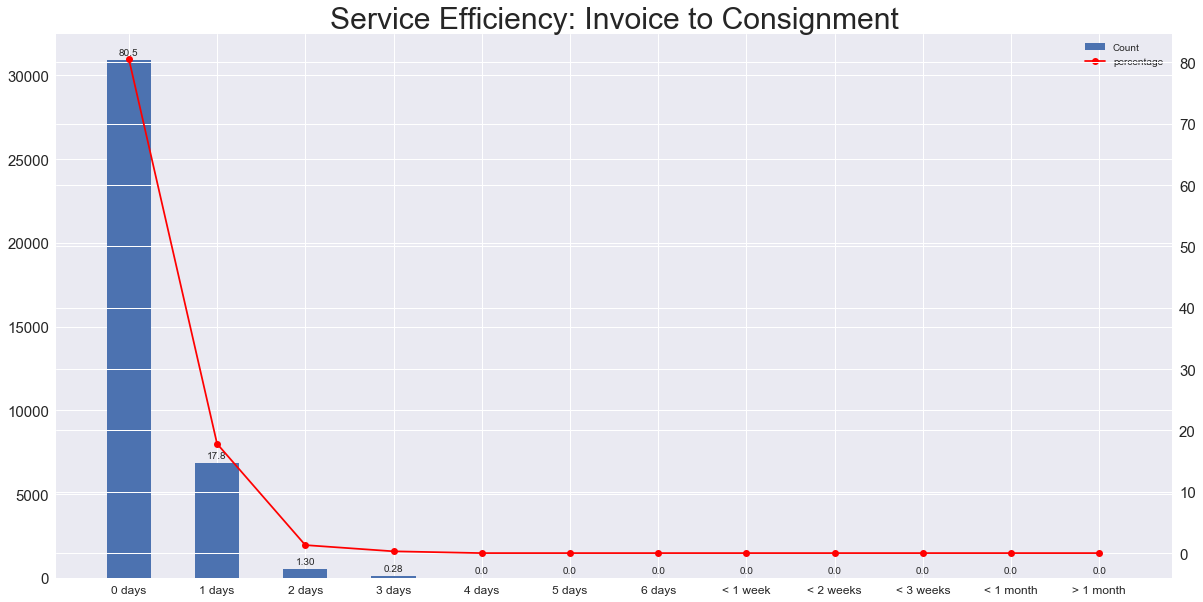

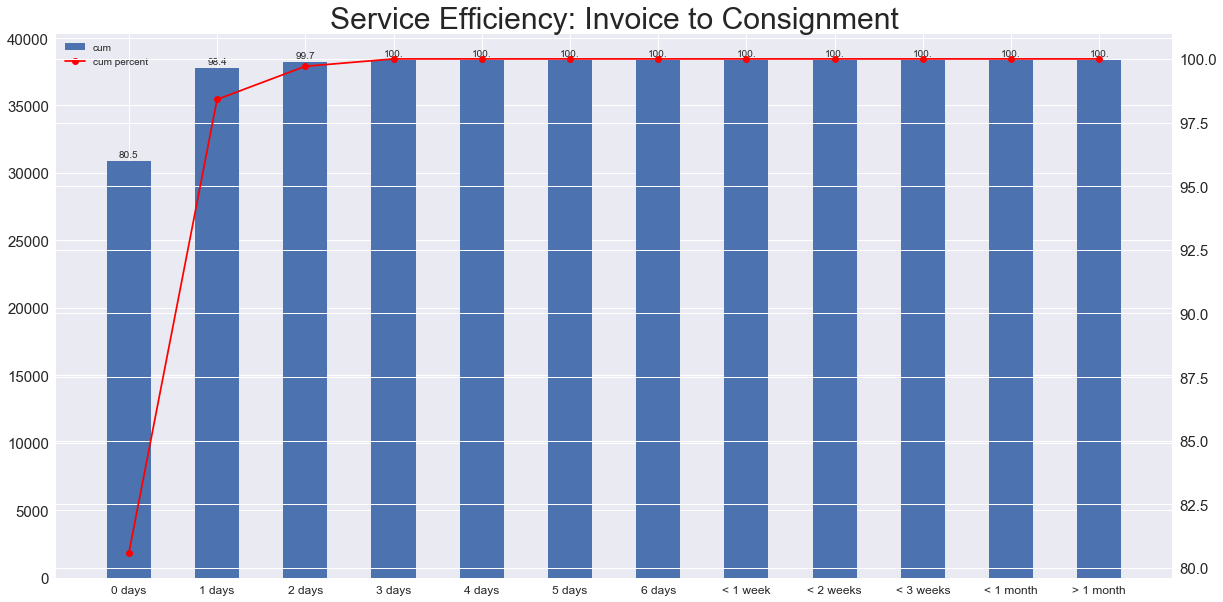

In [298]:
tmp = bill_to_GC['BILL_TO_GC'].value_counts().reset_index()
tmp.columns = ['Days', 'Count']
tmp['Days'] = tmp['Days'].apply(lambda x: x.days)
tmp.sort_values(by=['Days'], inplace=True)
tmp = tmp.reset_index().drop('index', axis=1)
display_days_difference(tmp, 'Service Efficiency: Invoice to Consignment')

## 4. Consignment to receipt

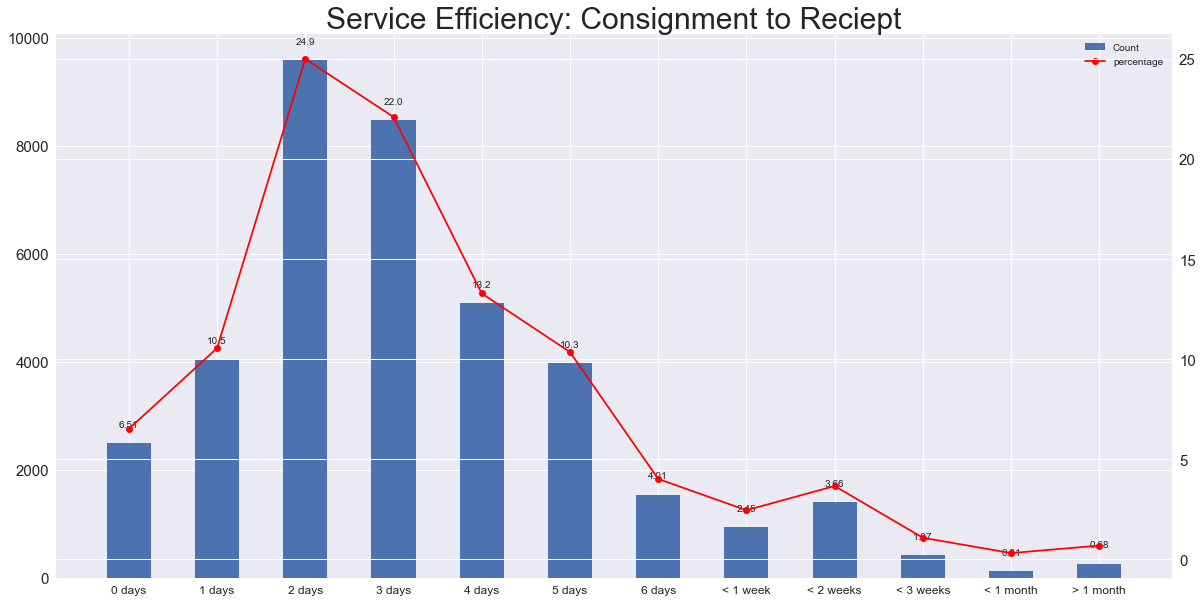

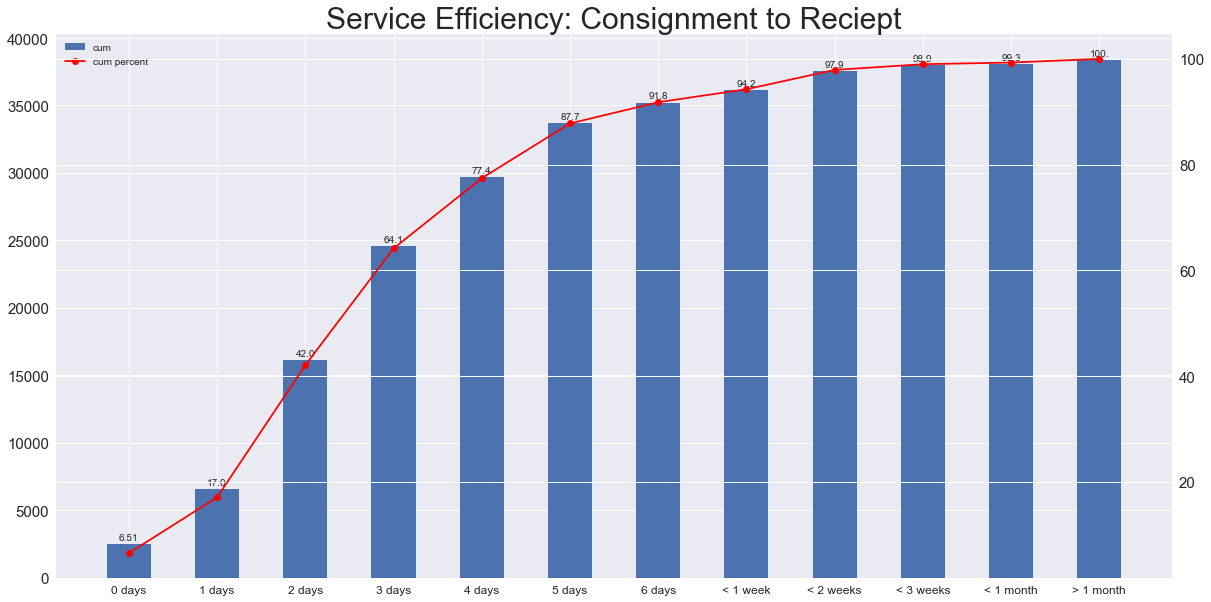

In [299]:
GC_to_recpt = bill[['GC date', 'Recpt date']]
GC_to_recpt.loc[:, 'GC_TO_RECPT'] = GC_to_recpt['Recpt date'] - GC_to_recpt['GC date']
tmp = GC_to_recpt['GC_TO_RECPT'].value_counts().reset_index()
tmp.columns = ['Days', 'Count']
tmp['Days'] = tmp['Days'].apply(lambda x: x.days)
tmp.sort_values(by=['Days'], inplace=True)
tmp = tmp.reset_index().drop('index', axis=1)
display_days_difference(tmp, 'Service Efficiency: Consignment to Reciept')

## TOTAL TIME 

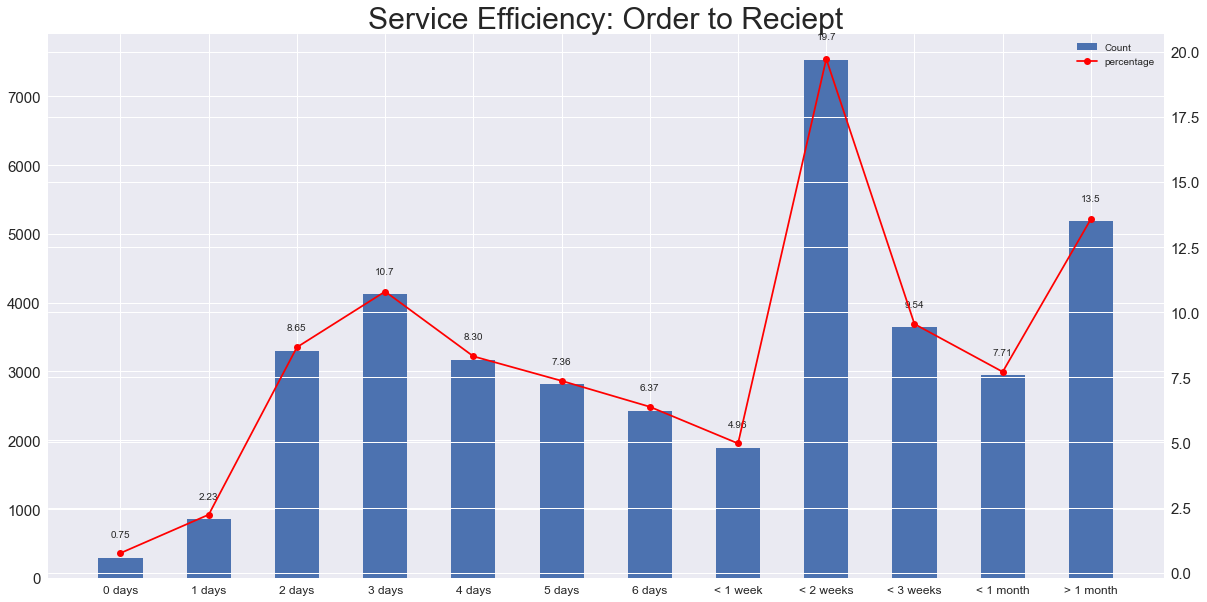

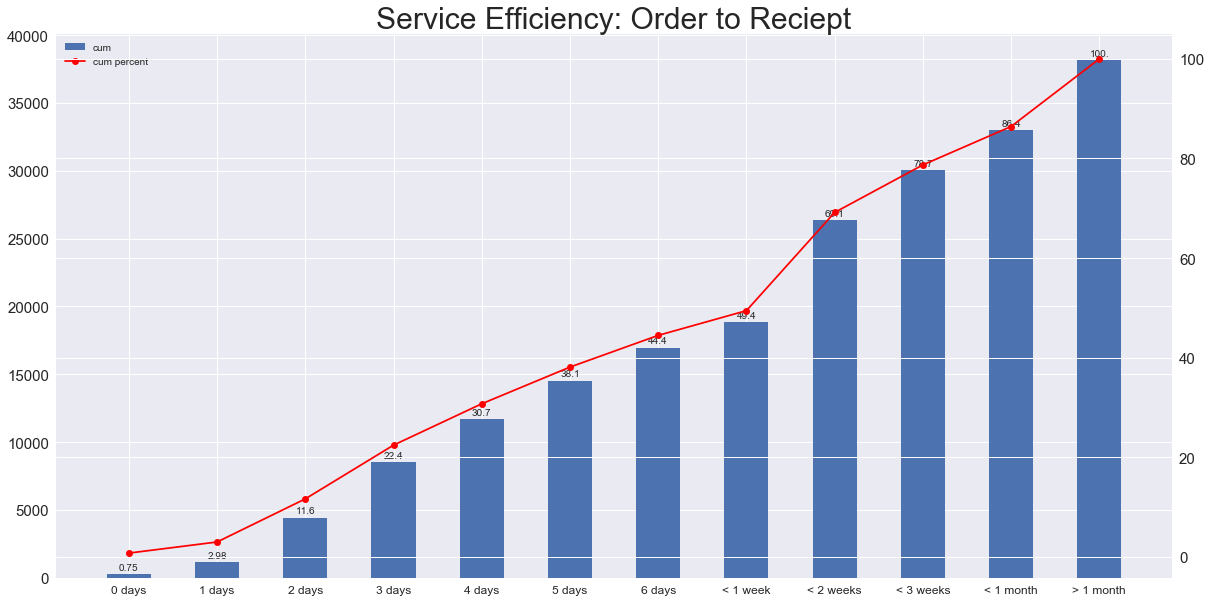

In [300]:
PO_to_recpt = bill[['PO date', 'Recpt date']]
PO_to_recpt.loc[:, 'PO_TO_RECPT'] = PO_to_recpt['Recpt date'] - PO_to_recpt['PO date']
tmp = PO_to_recpt['PO_TO_RECPT'].value_counts().reset_index()
tmp.columns = ['Days', 'Count']
tmp['Days'] = tmp['Days'].apply(lambda x: x.days)
tmp.sort_values(by=['Days'], inplace=True)
tmp = tmp.reset_index().drop('index', axis=1)
display_days_difference(tmp, 'Service Efficiency: Order to Reciept')

# Customer wise sales


In [301]:
customer.head(2)

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date
0,A1283,ACC LIMITED,442502,Maharashtra,Mining,101191774,10,6261-71-4112I.,TUBE (D155A-6) (6261-71-4111I.),2016-05-11,1,930.0,4017,Req of Mr. Bhattacha,2016-05-11
1,A1284,ASSOCIATED CEMENT CO LTD,483880,Madhya Pradesh,Cement,101196605,10,702-21-57700I.,PILOT VALVE (PC2000-8R) (702-21-55800I.),2016-09-22,2,930.0,15344,1200620728 & 1200620,2016-09-16


In [302]:
#Finding the total price corresponding to each customer 

customer['Total_Price'] = customer['ORD_QTY'] * customer['Price']
customer.head(1)

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date,Total_Price
0,A1283,ACC LIMITED,442502,Maharashtra,Mining,101191774,10,6261-71-4112I.,TUBE (D155A-6) (6261-71-4111I.),2016-05-11,1,930.0,4017,Req of Mr. Bhattacha,2016-05-11,4017


In [303]:
tmp = customer[['customer code', 'Total_Price']]
tmp = tmp.groupby(['customer code']).sum().reset_index()
tmp.sort_values(by='Total_Price', ascending=False, inplace=True)
tmp = tmp.reset_index(drop=True)

tmp2 = tmp.loc[50:]
tmp = tmp.loc[:49]
tmp.loc[50] = ['Others', tmp2['Total_Price'].sum()]

[]

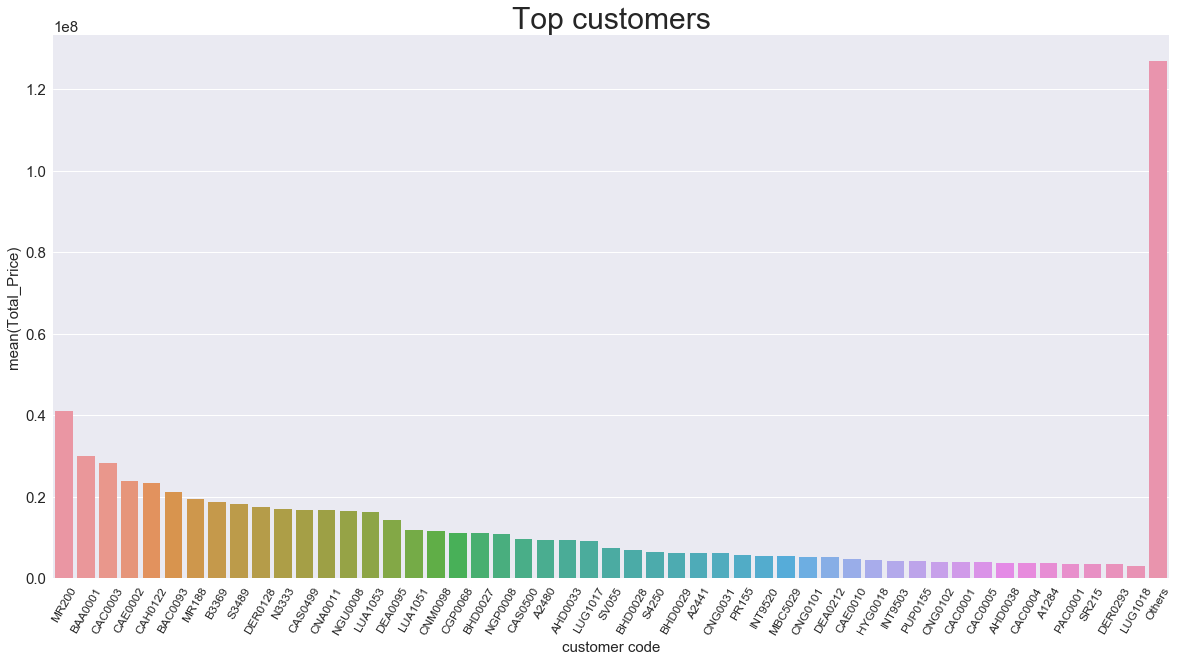

In [304]:
sns.barplot(x='customer code', y='Total_Price', data=tmp)
plt.xticks(rotation=60)
plt.title("Top customers")
plt.plot()

# Region wise Sales

In [305]:
customer.head(2)

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date,Total_Price
0,A1283,ACC LIMITED,442502,Maharashtra,Mining,101191774,10,6261-71-4112I.,TUBE (D155A-6) (6261-71-4111I.),2016-05-11,1,930.0,4017,Req of Mr. Bhattacha,2016-05-11,4017
1,A1284,ASSOCIATED CEMENT CO LTD,483880,Madhya Pradesh,Cement,101196605,10,702-21-57700I.,PILOT VALVE (PC2000-8R) (702-21-55800I.),2016-09-22,2,930.0,15344,1200620728 & 1200620,2016-09-16,30688


In [306]:
df = customer.groupby('Region')['Total_Price'].sum().reset_index()
# sort by income
df = df.sort_values(by='Total_Price', ascending=False)
df = df.reset_index(drop=True)

[]

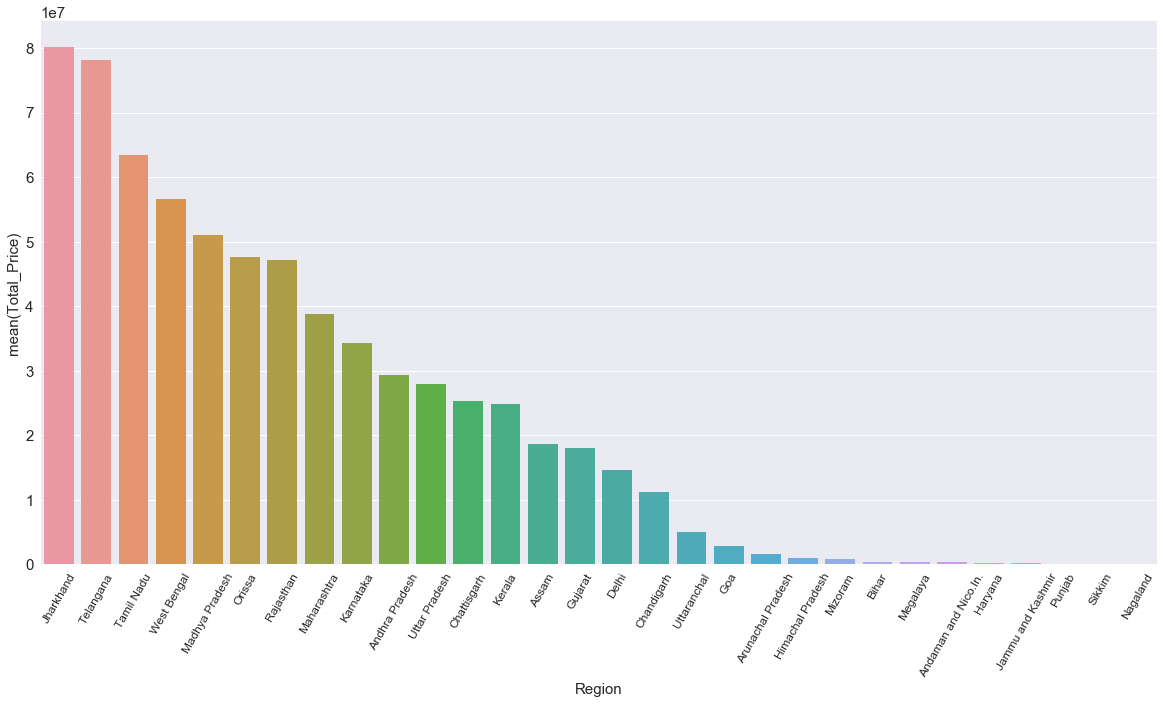

In [307]:
#Plotting the region wise profit graph

sns.barplot(x = 'Region', y= 'Total_Price', data=df)
plt.xticks(rotation=60)
plt.plot()

# Material Wise Profit

In [308]:
customer.head(2)

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date,Total_Price
0,A1283,ACC LIMITED,442502,Maharashtra,Mining,101191774,10,6261-71-4112I.,TUBE (D155A-6) (6261-71-4111I.),2016-05-11,1,930.0,4017,Req of Mr. Bhattacha,2016-05-11,4017
1,A1284,ASSOCIATED CEMENT CO LTD,483880,Madhya Pradesh,Cement,101196605,10,702-21-57700I.,PILOT VALVE (PC2000-8R) (702-21-55800I.),2016-09-22,2,930.0,15344,1200620728 & 1200620,2016-09-16,30688


In [309]:
df = customer.groupby('PTNO')['Total_Price'].sum().reset_index()
# sort by income
df = df.sort_values(by='Total_Price', ascending=False)
df = df.reset_index(drop=True)

tmp = df.loc[50:]
df = df.loc[:49]
df.loc[50] = ['Others', tmp['Total_Price'].sum()]

[]

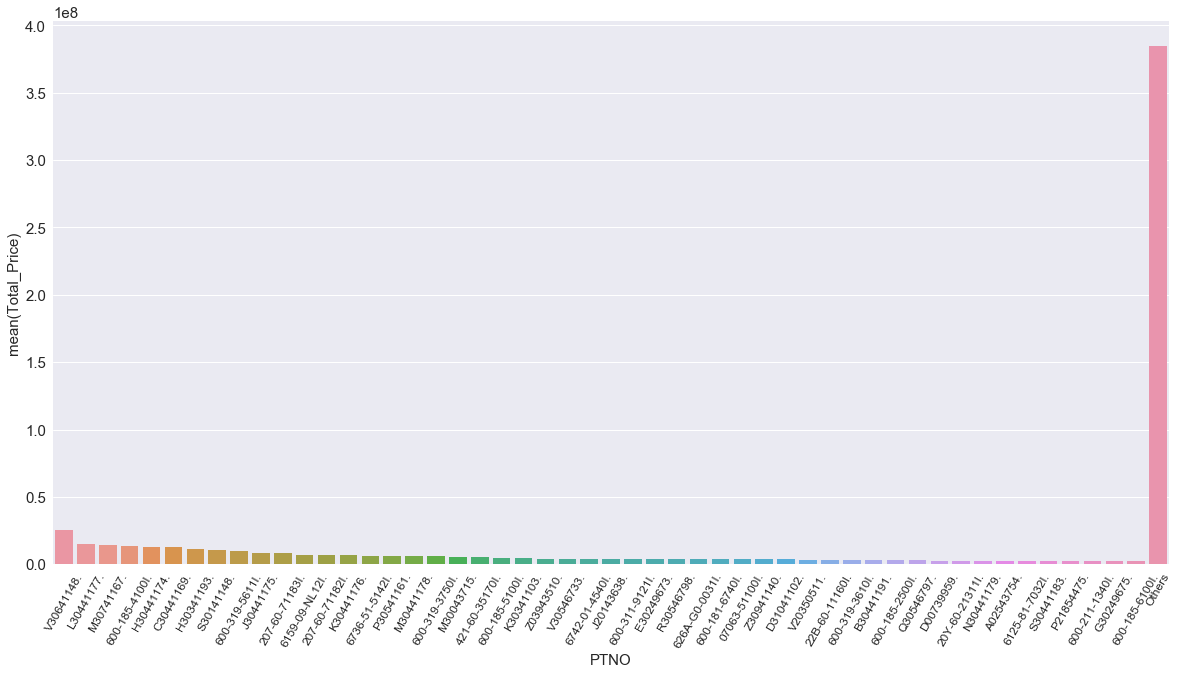

In [310]:
#Plotting the region wise profit graph

sns.barplot(x = 'PTNO', y= 'Total_Price', data=df)
plt.xticks(rotation=60)
plt.plot()

# Model wise demand

In [311]:
material_master.head()

,Material code,Material Description,Model,safety stock,Demand
0,01010-61435I.,BOLT (01010-51435I),PC450,8,30
1,01010-61455I.,BOLT (D65E-12) (01010-31455I.),D65,1,2
2,01010-61635I.,BOLT (GD511),GD511,1,12
3,01010-61645I.,BOLT (01010-81645I.),D475,8,32
4,01010-61650I.,BOLT (HD465) (01010-81650I.),HD465,5,18


In [312]:
model_demand = material_master
model_demand = model_demand.groupby('Model').sum().reset_index()
model_demand.drop(['safety stock'], axis=1, inplace=True)
model = model_demand.sort_values(by='Demand', ascending=False)
model = model.reset_index(drop=True)
model.head(15)

,Model,Demand
0,PC200,129526
1,PC300,61608
2,PC71,44963
3,PC210,34785
4,D155,32093
5,300CK,29608
6,PC130,26286
7,PC450,21973
8,Others,14919
9,OTHER,13158


In [313]:
# 8, 9 is others, lets combine and remove them
tmp = model.loc[8:9]
model = model.drop([8, 9])
tmp

,Model,Demand
8,Others,14919
9,OTHER,13158


In [314]:
model = model.reset_index(drop=True)
tmp = tmp.reset_index(drop=True)

In [315]:
tmp

,Model,Demand
0,Others,14919
1,OTHER,13158


In [316]:
tmp = pd.concat([tmp, model.loc[10:]])
model = model.loc[:9]
model.loc[10] = ['Others', tmp['Demand'].sum()]

[]

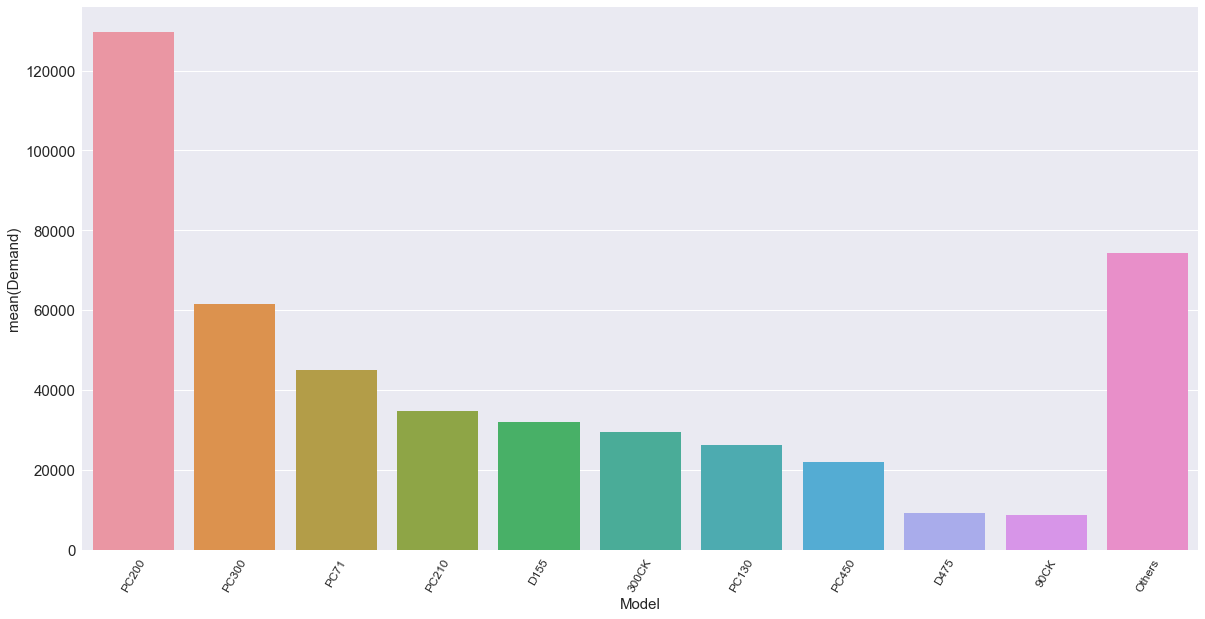

In [317]:
sns.barplot(x = 'Model', y= 'Demand', data=model)
plt.xticks(rotation=60)
plt.plot()

# Pie chart to be displayed : Out of stock or stocks needed immediately

In [318]:
stock_df = material_master.merge(stock_master,left_on='Material code',right_on = 'Material')
stock_df.drop(['Material Description','DocumentNo','D/C','Amount','BUn','Pstng Date','Material'],axis=1, inplace=True)
stock_df.tail()

,Material code,Model,safety stock,Demand,Itm,Quantity
68550,Z30941140.,PC200,4,14,1,1
68551,Z30941140.,PC200,4,14,1,1
68552,Z30941140.,PC200,4,14,1,1
68553,Z30941140.,PC200,4,14,1,1
68554,Z30941140.,PC200,4,14,1,1


In [319]:
stock_df = stock_df.groupby(['Material code','Model','safety stock'])['Quantity'].sum().reset_index()
stock_df.head()

,Material code,Model,safety stock,Quantity
0,01010-61435I.,PC450,8,86
1,01010-61455I.,D65,1,4
2,01010-61635I.,GD511,1,34
3,01010-61645I.,D475,8,4
4,01010-61650I.,HD465,5,8


In [320]:
# checking for various conditions
def test (row):
   if row['safety stock'] < row['Quantity']  :
      return 'IN_STOCK'
   if row['safety stock'] > row['Quantity']  :
      return 'OUT_OF_STOCK'
   if row['safety stock'] == row['Quantity']  :
      return 'NEW_STOCK_NEEDED'
  
   return 'Other'

In [321]:
stock_df['status'] = stock_df.apply (lambda row: test (row),axis=1)

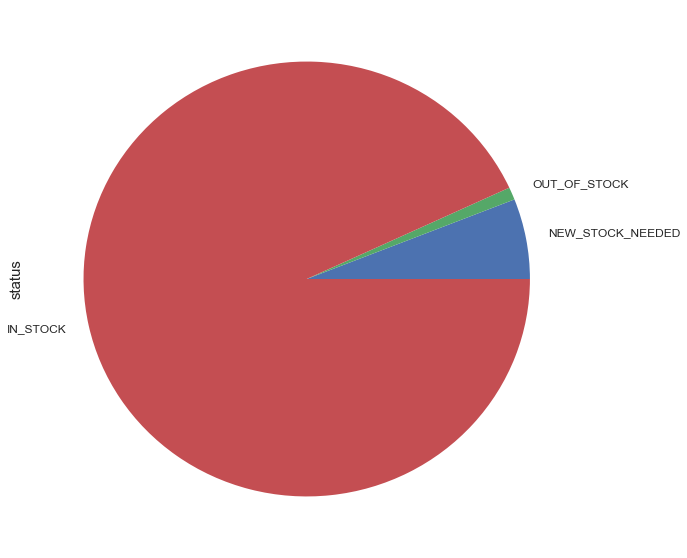

In [322]:
#pie chart(using quantity and safety_stock)

plt.figure(figsize=(10, 10))
stock_df.status.value_counts(sort=False).plot(kind='pie')
plt.show()

**printing materials which are out of stock**

In [323]:
#Retriving materials which are out of stock from stock_df table
ofs=stock_df.loc[stock_df['status'] == 'OUT_OF_STOCK']

In [324]:
ofs.head()

,Material code,Model,safety stock,Quantity,status
3,01010-61645I.,D475,8,4,OUT_OF_STOCK
9,01010-61865I.,D65,113,85,OUT_OF_STOCK
34,01011-61880I.,PC300,10,4,OUT_OF_STOCK
57,01252-60820I.,PC130,9,1,OUT_OF_STOCK
152,01643-51032.,HD785,19,16,OUT_OF_STOCK


In [325]:
#resetting index
ofs=ofs.reset_index(drop=True)

In [326]:
#Finding how much stock is needed
ofs['Stock Needed'] = ofs['safety stock'] + ofs['Quantity']

In [327]:
ofs.head(3)

,Material code,Model,safety stock,Quantity,status,Stock Needed
0,01010-61645I.,D475,8,4,OUT_OF_STOCK,12
1,01010-61865I.,D65,113,85,OUT_OF_STOCK,198
2,01011-61880I.,PC300,10,4,OUT_OF_STOCK,14


In [328]:
#sorting by the value of stock needed(difference)
ofs=ofs.sort_values(by='Stock Needed',ascending=False)
ofs=ofs.reset_index(drop=True)

[]

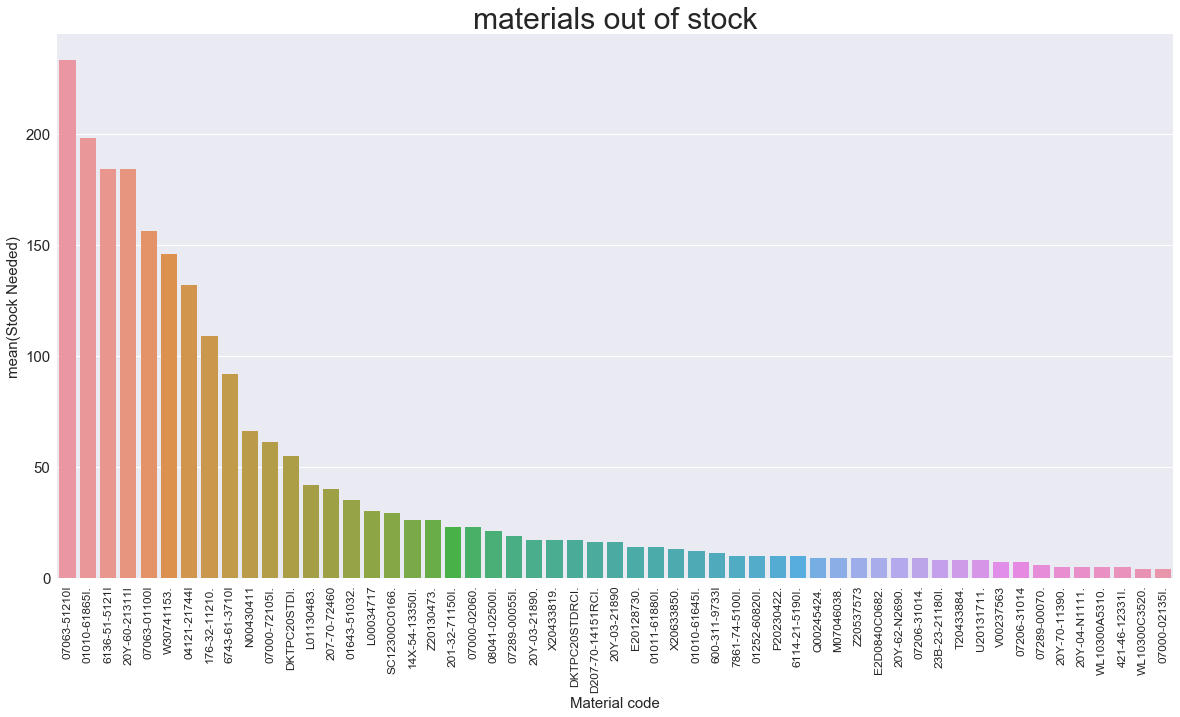

In [329]:
#Bar graph for the materials which are out of stock
sns.barplot(x = 'Material code', y = 'Stock Needed',data=ofs)
plt.xticks(rotation=90)
plt.title('materials out of stock')
plt.plot()

# Season wise demand forecast


Here we try to find out how the demand for various products in the company vary with the seasons

First we split the order dates for each material according to seasons
We consider 5 seasons:   
1. Winter - November to Feb (11,12,1,2)
2. Spring - March to April (3,4)  
3. Summer - May to June (5,6)
4. Monsoon - July to August (7,8)  
5. Autumn - September to October (9,10)

In [330]:
customer.head(2)

,customer code,Name,PostalCode,Region,Industry,SONO,ITEM,PTNO,DESC,DATE,ORD_QTY,PLNT,Price,customer PO ref,PO date,Total_Price
0,A1283,ACC LIMITED,442502,Maharashtra,Mining,101191774,10,6261-71-4112I.,TUBE (D155A-6) (6261-71-4111I.),2016-05-11,1,930.0,4017,Req of Mr. Bhattacha,2016-05-11,4017
1,A1284,ASSOCIATED CEMENT CO LTD,483880,Madhya Pradesh,Cement,101196605,10,702-21-57700I.,PILOT VALVE (PC2000-8R) (702-21-55800I.),2016-09-22,2,930.0,15344,1200620728 & 1200620,2016-09-16,30688


 Lets get the month from 'PO date' and assign it to a new df

In [331]:
df = customer[['PO date', 'Total_Price']]
df.loc[:, 'month'] = df['PO date'].apply(lambda x: x.month)
df = df.drop(['PO date'], axis=1)

In [332]:
df = df.groupby(['month']).sum().reset_index()

In [333]:
# checking for various conditions
def test_s (row):
   if (row['month'] ==1)|(row['month']==2)   :
      return 'winter'
   
   if (row['month'] ==3)|(row['month'] ==4)   :
      return 'spring'
   if (row['month'] ==5)|(row['month'] ==6)  :
      return 'summer'
   if (row['month']==7)|(row['month']==8) :
      return 'mansoon'
   if (row['month'] ==9)|(row['month'] ==10)   :
      return 'autumn'
   if (row['month'] ==11)|(row['month'] ==12)   :
      return 'winter'

In [334]:
df['season'] = df.apply (lambda row: test_s (row),axis=1)
df = df.drop(['month'], axis=1)

In [335]:
df = df.groupby('season').sum().reset_index()
df['percentage'] = 100*df.Total_Price/df.Total_Price.sum()
df

,season,Total_Price,percentage
0,autumn,115282947,16.943341
1,mansoon,190583361,28.010378
2,spring,136098629,20.002659
3,summer,229683886,33.757052
4,winter,8753860,1.286570


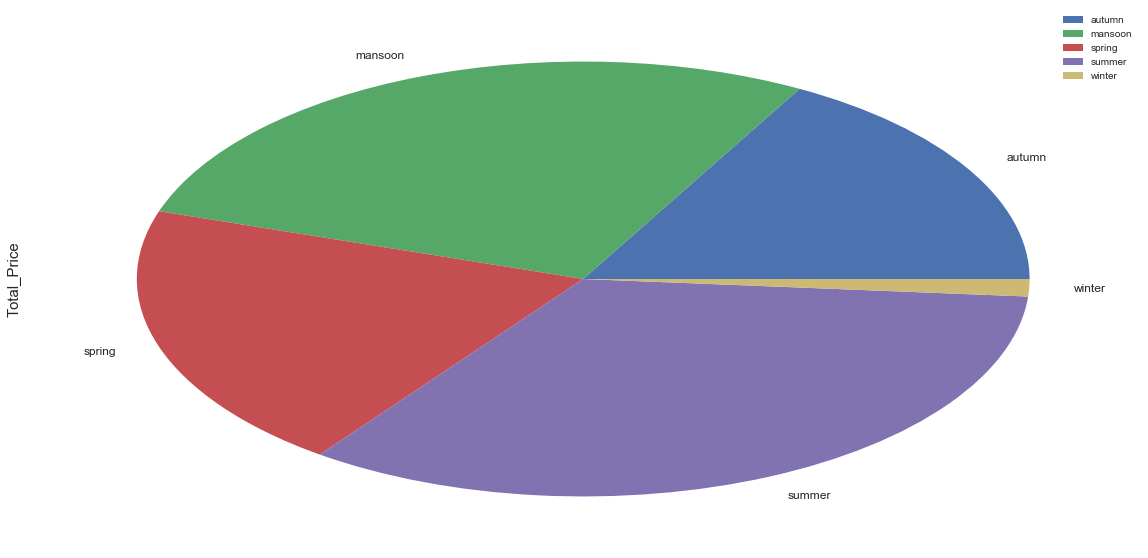

In [336]:
plt.figure(figsize=(10, 10))
df.plot(kind='pie', y='Total_Price', labels=df['season'])
plt.show()

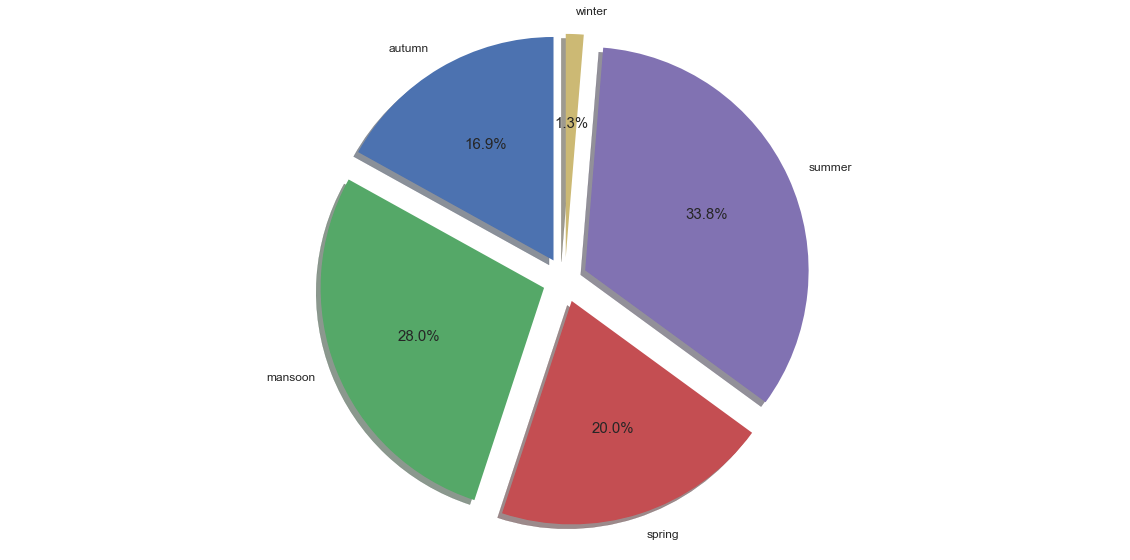

In [337]:
matplotlib.rcParams['font.size'] = 15.0
labels = df['season']
sizes = df['percentage']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Checking possible reason for delay from consignment to delivery

In [338]:
GC_to_recpt = bill[['GC date', 'Recpt date', 'Consignment details']]
GC_to_recpt.loc[:, 'GC_TO_RECPT'] = GC_to_recpt['Recpt date'] - GC_to_recpt['GC date']
GC_to_recpt = GC_to_recpt.sort_values(by='GC_TO_RECPT', ascending=False)
GC_to_recpt = GC_to_recpt.groupby('Consignment details').sum().reset_index().sort_values(by='GC_TO_RECPT', ascending=False).reset_index(drop=True)

TypeError: Cannot cast ufunc less input from dtype('<m8[ns]') to dtype('<m8') with casting rule 'same_kind'

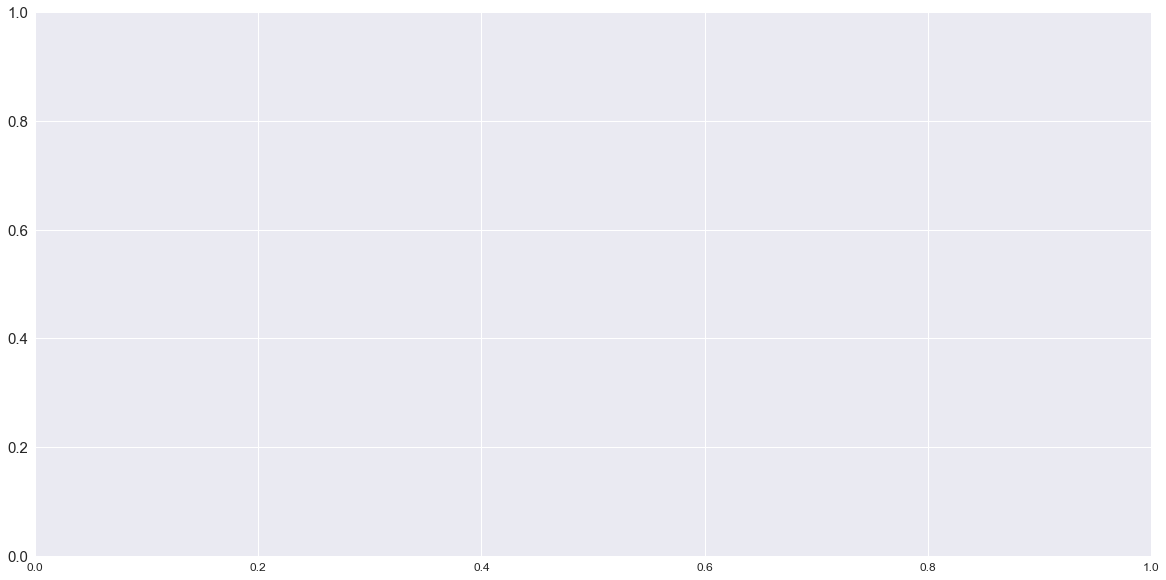

In [339]:
# Top 20 reasons for consignment delays

GC_to_recpt = GC_to_recpt.loc[:20]
sns.barplot(y = 'GC_TO_RECPT', x= 'Consignment details', data=GC_to_recpt)
plt.xticks(rotation=90)
plt.title('Top 20 reasons for consignment delays')
plt.show()

# Query Drill down

In [502]:
# Lets see if the orders fluctuate as per the date, you know if there
# is a season for most orders. Maybe end of fiscal year or start of new
# fiscal year, this would show optimal time to pump up production of parts

# df is a new dataframe created using the customer_order table, we only need
# to put emphasis on the date of orders and the Price.
df = customer[['PO date', 'Total_Price', 'ORD_QTY']]

In [503]:
df = df.groupby(['PO date']).sum().reset_index()
df = df.sort_values(by=['PO date'])
df['PO date'] = pd.to_datetime(df['PO date'])

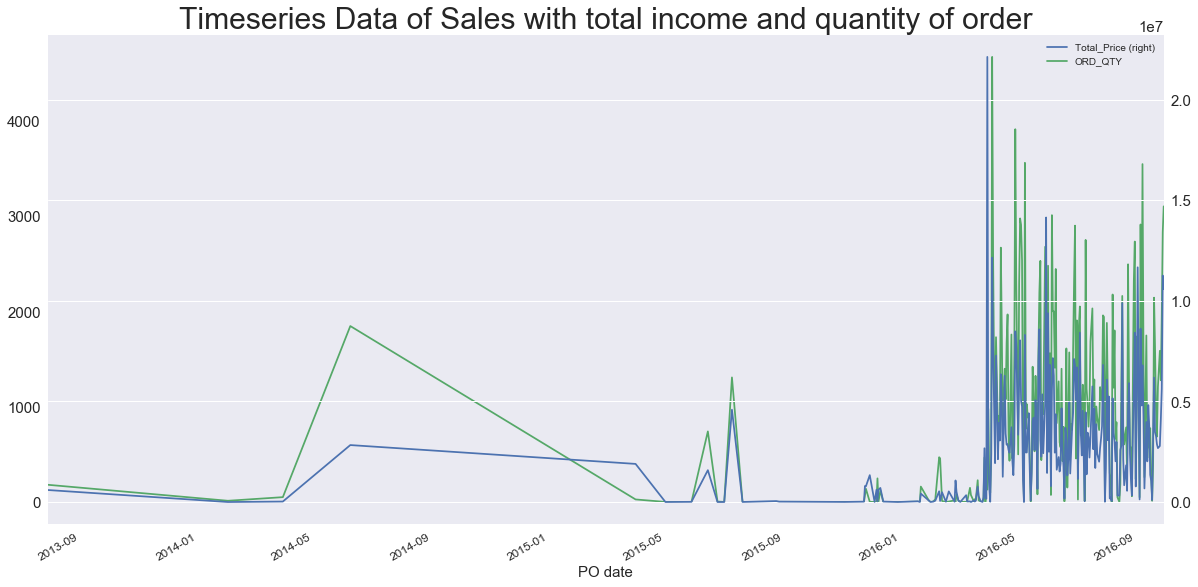

In [504]:
ax = df.plot(x='PO date', y='Total_Price', secondary_y=True)
df.plot(x='PO date', y='ORD_QTY', ax=ax)
plt.title('Timeseries Data of Sales with total income and quantity of order')
plt.show()

### Month of the year

In [505]:
df = customer[['PO date', 'Total_Price', 'ORD_QTY']]
df.loc[:,'month'] = df['PO date'].apply(lambda x: x.month)
df = df.drop(['PO date'], axis=1)
df = df.groupby(['month']).sum().reset_index()

In [506]:
df

,month,Total_Price,ORD_QTY
0,1,534144,191
1,2,3298831,1099
2,3,27143439,1439
3,4,108955190,38685
4,5,120713266,38275
5,6,108970620,38315
6,7,104511662,34957
7,8,86071699,29733
8,9,115282947,35748
9,11,2934394,215


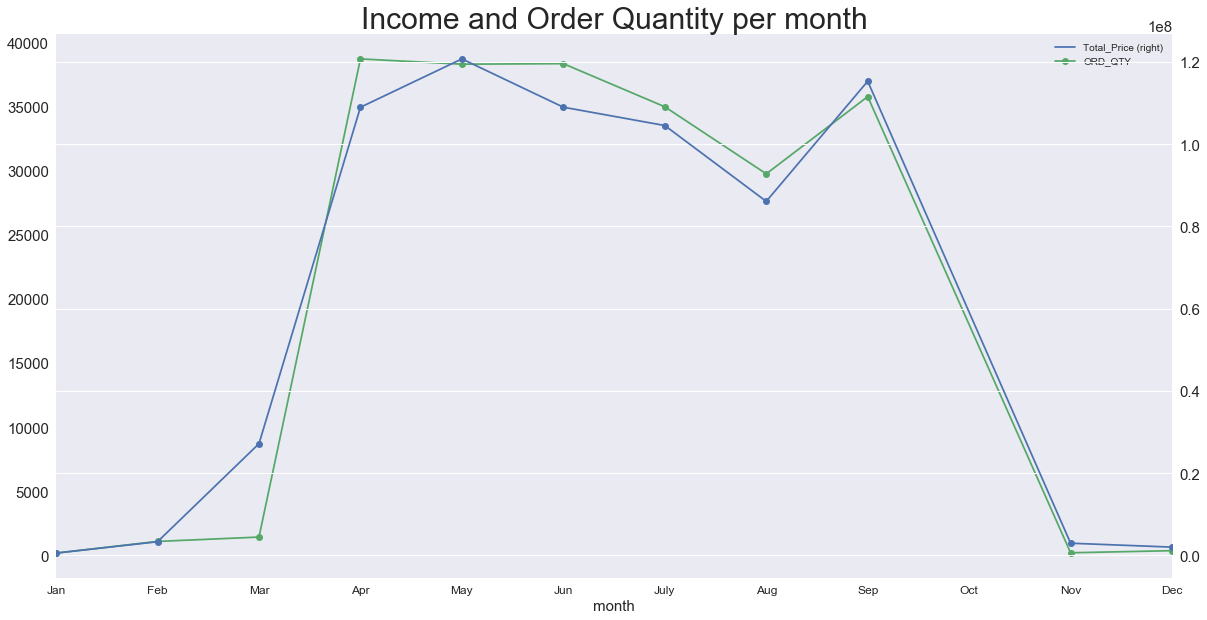

In [507]:
ax = df.plot(x='month', y='Total_Price', secondary_y=True, marker='o')
df.plot(x='month', y='ORD_QTY', marker='o', ax=ax)
plt.xticks([x for x in xrange(1, 13)], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Income and Order Quantity per month')
plt.show()

### Day of the month

In [508]:
df = customer[['PO date', 'Total_Price', 'ORD_QTY']]
df.loc[:,'day'] = df['PO date'].apply(lambda x: x.day)
df = df.drop(['PO date'], axis=1)
df = df.groupby(['day']).sum().reset_index()

In [509]:
df.head()

,day,Total_Price,ORD_QTY
0,1,12893564,3604
1,2,30516498,8774
2,3,24459472,5732
3,4,26489072,7810
4,5,26719262,10069


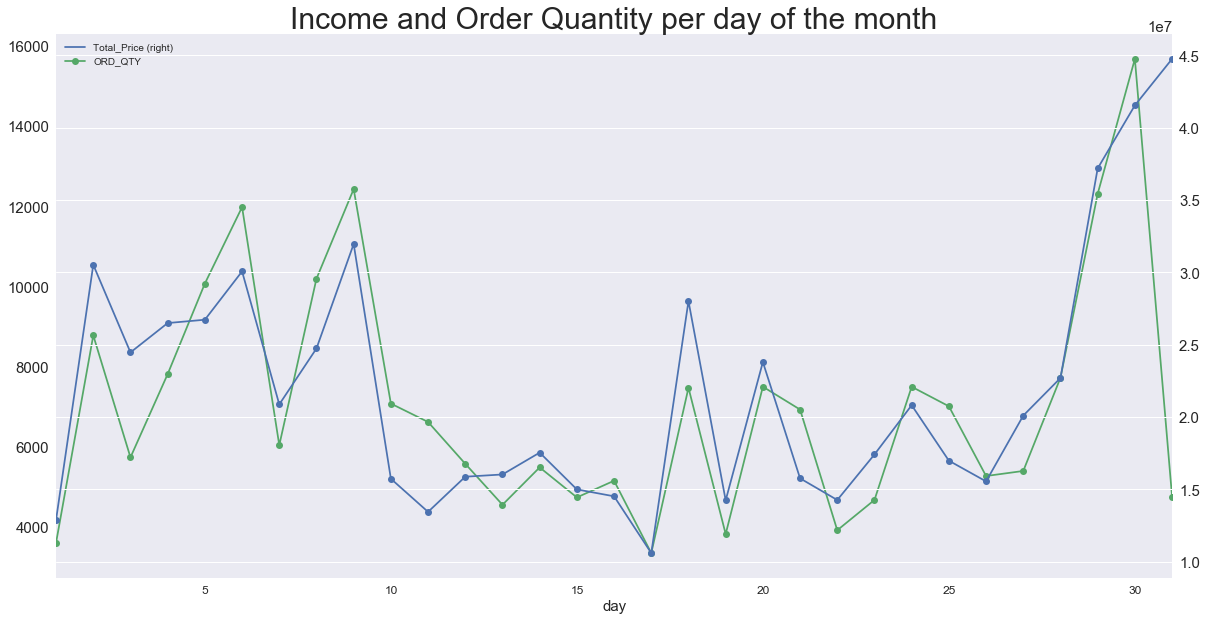

In [510]:
ax = df.plot(x='day', y='Total_Price', secondary_y=True, marker='o')
df.plot(x='day', y='ORD_QTY', marker='o', ax=ax)
plt.title('Income and Order Quantity per day of the month')
plt.show()

### Machine Learning

In [511]:
sales_past_demand.head()

,Material code,DEM36,DEM35,DEM34,DEM33,DEM32,DEM31,DEM30,DEM29,DEM28,...,DEM10,DEM9,DEM8,DEM7,DEM6,DEM5,DEM4,DEM3,DEM2,DEM1
0,01010-61435I.,6,0,0,0,0,0,5,0,0,...,0,4,0,0,16,12,2,0,0,0
1,01010-61455I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,01010-61635I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,1,0
3,01010-61645I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,01010-61650I.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [512]:
tmp = sales_past_demand.drop(['Material code'], axis=1)

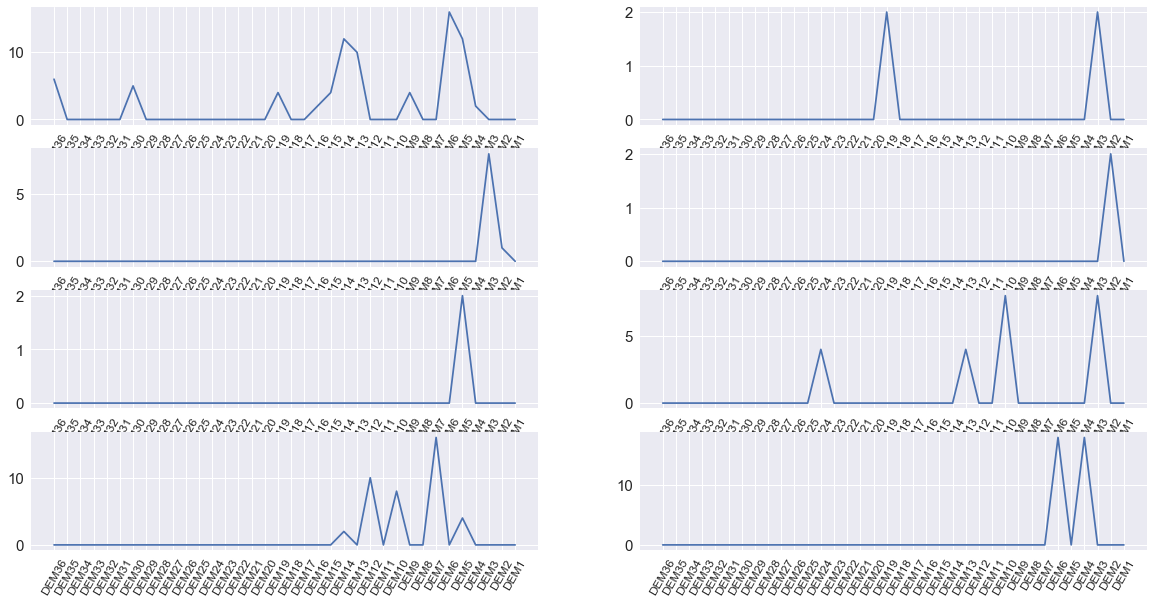

In [513]:
for i in xrange(0, 8):
    plt.subplot(4, 2, i + 1)
    plt.plot([x for x in range(0, 36)], tmp.loc[i].values)
    plt.xticks([x for x in range(0, 36)], tmp.loc[i].index, rotation=60)
plt.show()

There is no periodicity in this whatsoever, perhaps we need to find other factors which influence these purchases? Or maybe we could try and represent data in some other form?

Instead of data per month, divide the data as to have data per 4 months. This allows us to predict the demand for the next four months which would be aggregated better than data per month.

In [514]:
df = pd.DataFrame()
df['Material code'] = sales_past_demand['Material code']
for i in range(1, 37, 4):
    df['Q_' + str((i-1)/4)] = sales_past_demand[['DEM' + str(x) for x in range(i, i + 4)]].sum(axis=1)

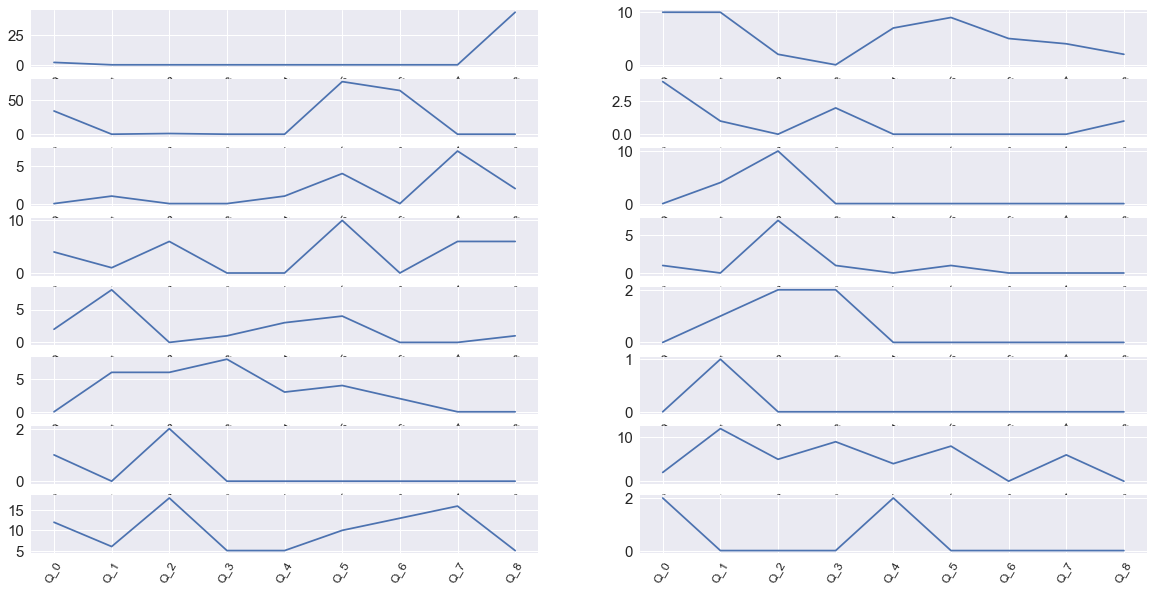

In [515]:
tmp = df.drop(['Material code'], axis=1)
for i in xrange(0, 16):
    plt.subplot(8, 2, i + 1)
    plt.plot([x for x in range(0, 9)], tmp.loc[i+100].values)
    plt.xticks([x for x in range(0, 9)], tmp.loc[i+100].index, rotation=60)
plt.show()

Here, we can some sort of patterns. this could be predicted well. First lets see the prediction value, if we predict 0 for Q_8 by default.

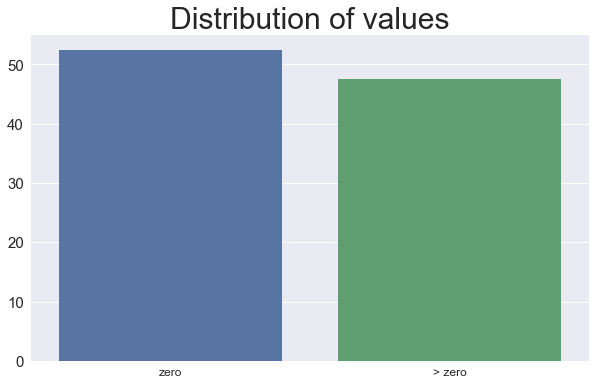

If we predict the demand to be zero every time, our accuracy would therefore be: 52.4078379276 %


In [516]:
x = len(tmp[tmp['Q_8'] == 0])/float(len(tmp))
y = 1 - x
x = x * 100
y = y * 100
plt.figure(figsize=(10, 6))
plt.title('Distribution of values')
sns.barplot(y = [x, y], x = ['zero', '> zero'])
plt.show()
print 'If we predict the demand to be zero every time, our accuracy would therefore be:', x, '%'

So are prediction should at minimum perform better than 52%. Lets drop the 'Material code' since we're training our model to predict the demand for any given material, the idea is that we have the demand of 8 Quaters, so we train the model to predict the nth Quater when trained on the (n - 1)th to (n - 8)th Quaters.

This model could then be used to predict the (n + 1)th demand given the nth to (n - 7)th Quaters deamnds.

In [517]:
df = df.drop(['Material code'], axis=1)
df.columns

Index([u'Q_0', u'Q_1', u'Q_2', u'Q_3', u'Q_4', u'Q_5', u'Q_6', u'Q_7', u'Q_8'], dtype='object')

Lets assign y as the required output (Q_8) and the others as X the input (Q_1, Q_2 ... Q_7).

In [518]:
y = df['Q_8']
X = df.drop(['Q_8'], axis = 1)

Now we have our desired inputs and desired outputs. But it wouldn't make sense to train the machine learning algorithm and test it on the same data, so we'll now split our data into training and tests sets (70% - 30%).

In [519]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now using the ElasticNet() regression lets train and then test on our data set

In [520]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
reg.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Now our model is trained on our data, lets see the accuracy by trying to predict the test set

In [521]:
pred = reg.predict(X_test)
tempdf = pd.DataFrame()
tempdf.loc[:, 'real'] = y_test
tempdf.loc[:, 'pred1'] = pred
tempdf.reset_index(inplace=True, drop=True)
tempdf.head(10)

,real,pred1
0,0,8.059206
1,0,1.849572
2,0,2.712670
3,0,2.478977
4,0,7.047885
5,49,21.153963
6,1,4.170553
7,0,2.931797
8,0,1.859726
9,0,0.647321


In [522]:
#rounding off the values and converting them to int type
tempdf=tempdf.round(0)
tempdf['pred1'] = tempdf['pred1'].apply(np.int64)

In [523]:
#We'll save index value from y_test for future reference(to map material code)
tempdf1=y_test.copy()
tempdf1=y_test.reset_index(level=1)

In [524]:
tempdf1.head(3)

,index,Q_8
0,1992,0
1,1128,0
2,1244,0


In [525]:
tempdf1['Q_9']=tempdf['pred1']
del tempdf1['Q_8']

In [526]:
df2=df.copy()

In [527]:
df2.head()

,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8
0,2,28,4,28,4,0,0,5,6
1,2,0,0,0,2,0,0,0,0
2,9,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0


In [528]:
df2 = pd.merge(df2,tempdf1, left_index=True, right_on=['index'])

In [529]:
df2.head()

,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,index,Q_9
533,0,28,0,0,0,0,0,0,0,8,-3
1240,12,12,0,0,0,0,0,0,4,12,-1
397,4,0,0,0,0,0,0,0,0,14,2
504,10,0,0,0,0,0,0,0,0,15,1
368,6,0,4,9,8,5,2,1,1,17,4


In [530]:
df2=df2.reset_index(drop=True)

In [531]:
df2.head()

,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,index,Q_9
0,0,28,0,0,0,0,0,0,0,8,-3
1,12,12,0,0,0,0,0,0,4,12,-1
2,4,0,0,0,0,0,0,0,0,14,2
3,10,0,0,0,0,0,0,0,0,15,1
4,6,0,4,9,8,5,2,1,1,17,4


In [532]:
#removing negative values
df2[df2<0]=0

In [533]:
df2.head(3)

,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,index,Q_9
0,0,28,0,0,0,0,0,0,0,8,0
1,12,12,0,0,0,0,0,0,4,12,0
2,4,0,0,0,0,0,0,0,0,14,2


In [534]:
#moving index column to begining
df2 = df2[['index', 'Q_0', 'Q_1', 'Q_2', 'Q_3','Q_4', 'Q_5', 'Q_6', 'Q_7', 'Q_8', 'Q_9']]

In [535]:
#renaming index as material_index
df2.rename(columns={'index': 'material_index'}, inplace=True)

In [536]:
df2.head(3)

,material_index,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9
0,8,0,28,0,0,0,0,0,0,0,0
1,12,12,12,0,0,0,0,0,0,4,0
2,14,4,0,0,0,0,0,0,0,0,2


**First iteration is over** 

In [537]:
#preparing a copy of df2
df3=df2.copy()

**Second iteration of ElasticNet prediction**

Lets assign y as the required output (Q_9) and the others as X the input (Q_1, Q_2 ... Q_8).

In [538]:
y = df3['Q_9']
X = df3.drop(['Q_0', 'Q_9','material_index'], axis=1)

Now we have our desired inputs and desired outputs. But it wouldn't make sense to train the machine learning algorithm and test it on the same data, so we'll now split our data into training and tests sets (70% - 30%).

In [539]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now using the ElasticNet() regression lets train and then test on our data set

In [540]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
reg.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Now our model is trained on our data, lets see the accuracy by trying to predict the test set

In [541]:
pred = reg.predict(X_test)
tempdf = pd.DataFrame()
tempdf.loc[:, 'real'] = y_test
tempdf.loc[:, 'pred2'] = pred
tempdf.reset_index(inplace=True, drop=True)
tempdf.head(10)

,real,pred2
0,3,2.463354
1,2,2.173280
2,18,18.482192
3,2,2.205348
4,2,2.313514
5,2,3.184805
6,7,7.533716
7,2,2.033047
8,9,9.143833
9,1,2.108322


In [542]:
#rounding off the values and converting them to int type
tempdf=tempdf.round(0)
tempdf['pred2'] = tempdf['pred2'].apply(np.int64)

In [543]:
#We'll save index value from y_test for future reference(to map the predected elements to corresponding rows of df2) 
tempdf1=y_test.copy()
tempdf1=y_test.reset_index(level=1)

In [544]:
tempdf1.head(3)

,index,Q_9
0,1368,3
1,65,2
2,700,18


In [545]:
tempdf1['Q_10']=tempdf['pred2']
del tempdf1['Q_9']

In [546]:
df3 = pd.merge(df3,tempdf1, left_index=True, right_on=['index'])

In [547]:
df3.head()

,material_index,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,index,Q_10
380,50,2,4,0,0,8,0,0,0,4,2,15,1
87,70,123,135,139,106,155,112,67,74,95,77,23,65
60,84,2,0,0,0,8,0,1,0,0,3,29,2
189,88,2,0,0,0,0,0,0,0,0,2,30,2
215,92,3,7,20,1,5,19,7,15,5,18,32,16


In [548]:
df3=df3.reset_index(drop=True)

In [549]:
#since we're ending this iteration here well drop index column
del df3['index']

In [550]:
df3.head()

,material_index,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10
0,50,2,4,0,0,8,0,0,0,4,2,1
1,70,123,135,139,106,155,112,67,74,95,77,65
2,84,2,0,0,0,8,0,1,0,0,3,2
3,88,2,0,0,0,0,0,0,0,0,2,2
4,92,3,7,20,1,5,19,7,15,5,18,16


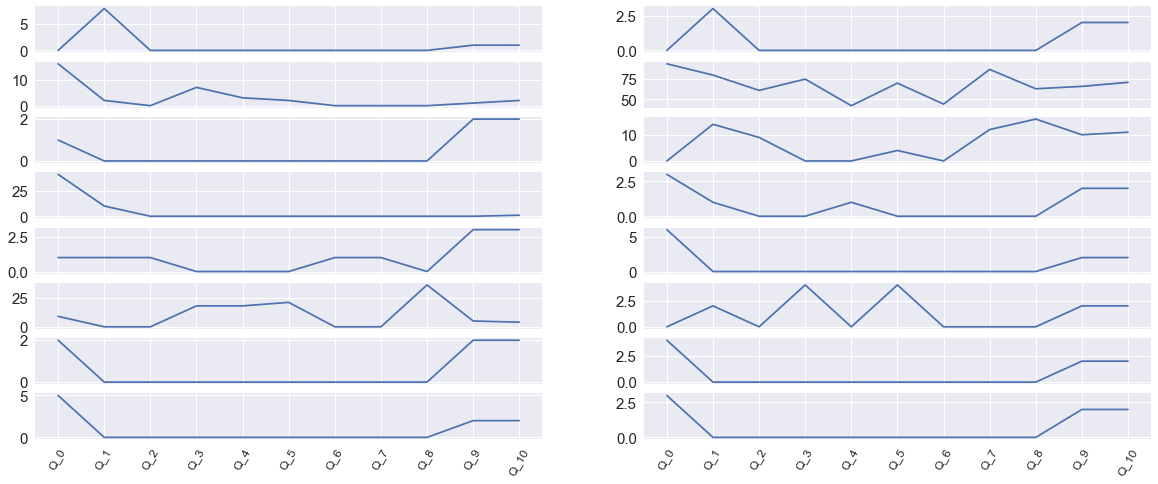

In [551]:
tmp = df3.drop(['material_index'], axis=1)
for i in xrange(0, 16):
    plt.subplot(10, 2, i + 1)
    plt.plot([x for x in range(0, 11)], tmp.loc[i+100].values)
    plt.xticks([x for x in range(0, 11)], tmp.loc[i+100].index, rotation=60)
plt.show()

**Predicted demand for two 4months intrevals**

In [552]:
final=pd.DataFrame()

In [553]:
#adding material code to dataframe
final['Material code']=sales_past_demand['Material code']

In [554]:
#adding demand columns
final = pd.merge(final,df3, left_index=True, right_on=['material_index'])

In [555]:
final.head()

,Material code,material_index,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10
0,01124-82250I.,50,2,4,0,0,8,0,0,0,4,2,1
1,01310-21216I.,70,123,135,139,106,155,112,67,74,95,77,65
2,01435-00814I.,84,2,0,0,0,8,0,1,0,0,3,2
3,01435-00865I.,88,2,0,0,0,0,0,0,0,0,2,2
4,01435-01025I.,92,3,7,20,1,5,19,7,15,5,18,16


In [556]:
#deleting material_index since we don't need this anymore
del final['material_index']

In [557]:
final.head(20)

,Material code,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10
0,01124-82250I.,2,4,0,0,8,0,0,0,4,2,1
1,01310-21216I.,123,135,139,106,155,112,67,74,95,77,65
2,01435-00814I.,2,0,0,0,8,0,1,0,0,3,2
3,01435-00865I.,2,0,0,0,0,0,0,0,0,2,2
4,01435-01025I.,3,7,20,1,5,19,7,15,5,18,16
5,015424KB.,0,6,6,8,3,4,2,0,0,3,3
6,01580-10806I.,2,12,5,9,4,8,0,6,0,6,6
7,01599-01011I.,4,0,1,4,0,0,0,0,0,2,3
8,01602-20825I.,2,0,0,0,0,0,0,0,0,2,2
9,01643-31445.,9,25,0,26,32,64,24,54,34,46,42


**End of second iteration and ElasticNet prediction**

Regression is always a problem, since we'll need to define an epsilon which is how much error we are ok with, so for e.g. if the real value was 1.5 and the predicted value was 1.7 will the difference 0.2 make it a good prediction or not.

Whereas if we convert the problem to that of a classification, it would perhaps yield better results. Keeping this is mind and looking at how our data predictions turned out, lets only try and predict if there is demand in the forecoming month, instead of how much demand.

In [558]:
# Convert 'y' to 1's and 0's

index = y[y > 0].index
y[index] = 1

In [559]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [560]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [561]:
ypred = clf.predict(X_test)
output = pd.DataFrame({ 'real' : y_test, 'pred': ypred })
output.head(20)

,pred,real
1368,1,1
65,1,1
700,1,1
938,1,1
1622,1,1
807,1,1
426,1,1
1726,1,1
414,1,1
532,1,1
